## Data Wrangling: Clean, Transform, Merge, Reshape

In [1]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [28]:
%matplotlib inline

## Combining and merging data sets

### Database-style DataFrame merges

In [ ]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df2 = DataFrame({'key': ['a', 'b', 'd'],
                 'data2': range(3)})
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2)

In [ ]:
pd.merge(df1, df2, on='key')

In [ ]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

In [ ]:
pd.merge(df1, df2, how='outer')

In [ ]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.merge(df1, df2, on='key', how='left')

In [ ]:
pd.merge(df1, df2, how='inner')

In [ ]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})
pd.merge(left, right, on=['key1', 'key2'], how='outer')

In [ ]:
pd.merge(left, right, on='key1')

In [ ]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

### Merging on index

In [ ]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [ ]:
left1

In [ ]:
right1

In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True)

In [ ]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

In [ ]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

In [ ]:
righth

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

In [ ]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

In [ ]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [ ]:
left2

In [ ]:
right2

In [ ]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

In [ ]:
left2.join(right2, how='outer')

In [ ]:
left1.join(right1, on='key')

In [ ]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [ ]:
left2.join([right2, another])

In [ ]:
left2.join([right2, another], how='outer')

### Concatenating along an axis

In [ ]:
arr = np.arange(12).reshape((3, 4))

In [ ]:
arr

In [ ]:
np.concatenate([arr, arr], axis=1)

In [2]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [ ]:
pd.concat([s1, s2, s3])

In [ ]:
pd.concat([s1, s2, s3], axis=1)

In [4]:
s4 = pd.concat([s1 * 5, s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [5]:
pd.concat([s1, s4], axis=1)

,0,1
a,0.0,0
b,1.0,5
f,NaN,5
g,NaN,6


In [6]:
pd.concat([s1, s4], axis=1, join='inner')

,0,1
a,0,0
b,1,5


In [7]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [9]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [10]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [ ]:
# Much more on the unstack function later
result.unstack()

In [ ]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

In [ ]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

In [ ]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

In [ ]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'],
          names=['upper', 'lower'])

In [ ]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
pd.concat([df1, df2], ignore_index=True)

### Combining data with overlap

In [ ]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [ ]:
a

In [ ]:
b

In [ ]:
np.where(pd.isnull(a), b, a)

In [ ]:
b[:-2].combine_first(a[2:])

In [ ]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df1.combine_first(df2)

## Reshaping and pivoting

### Reshaping with hierarchical indexing

In [ ]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

In [ ]:
result = data.stack()
result

In [ ]:
result.unstack()

In [ ]:
result.unstack(0)

In [ ]:
result.unstack('state')

In [ ]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

In [ ]:
data2.unstack().stack()

In [ ]:
data2.unstack().stack(dropna=False)

In [ ]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

In [ ]:
df.unstack('state')

In [ ]:
df.unstack('state').stack('side')

### Pivoting "long" to "wide" format

In [ ]:
data = pd.read_csv('ch07/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [ ]:
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item', 'value')
pivoted.head()

In [ ]:
ldata['value2'] = np.random.randn(len(ldata))
ldata[:10]

In [ ]:
pivoted = ldata.pivot('date', 'item')
pivoted[:5]

In [ ]:
pivoted['value'][:5]

In [ ]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

## Data transformation

### Removing duplicates

In [ ]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

In [ ]:
data.duplicated()

In [ ]:
data.drop_duplicates()

In [ ]:
data['v1'] = range(7)
data.drop_duplicates(['k1'])

In [ ]:
data.drop_duplicates(['k1', 'k2'], take_last=True)

### Transforming data using a function or mapping

In [2]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [3]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [5]:
print(data['food'].map(str.lower).map(meat_to_animal))
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object


,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [6]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

### Replacing values

In [ ]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

In [ ]:
data.replace(-999, np.nan)

In [ ]:
data.replace([-999, -1000], np.nan)

In [ ]:
data.replace([-999, -1000], [np.nan, 0])

In [ ]:
data.replace({-999: np.nan, -1000: 0})

### Renaming axis indexes

In [ ]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [ ]:
data.index.map(str.upper)

In [ ]:
data.index = data.index.map(str.upper)
data

In [ ]:
data.rename(index=str.title, columns=str.upper)

In [ ]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

In [ ]:
# Always returns a reference to a DataFrame
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)
data

### Discretization and binning

In [ ]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [ ]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

In [ ]:
cats.labels

In [ ]:
cats.levels

In [ ]:
pd.value_counts(cats)

In [ ]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

In [ ]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

In [ ]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

In [ ]:
data = np.random.randn(1000) # Normally distributed
cats = pd.qcut(data, 4) # Cut into quartiles
cats

In [ ]:
pd.value_counts(cats)

In [ ]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

### Detecting and filtering outliers

In [ ]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

In [ ]:
col = data[3]
col[np.abs(col) > 3]

In [ ]:
data[(np.abs(data) > 3).any(1)]

In [ ]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

### Permutation and random sampling

In [ ]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

In [ ]:
df

In [ ]:
df.take(sampler)

In [ ]:
df.take(np.random.permutation(len(df))[:3])

In [ ]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)

In [ ]:
sampler

In [ ]:
draws = bag.take(sampler)
draws

### Computing indicator / dummy variables

In [ ]:
df = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

In [ ]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

In [ ]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

In [ ]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [ ]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

In [ ]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

In [ ]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

In [ ]:
np.random.seed(12345)

In [ ]:
values = np.random.rand(10)
values

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

## String manipulation

### String object methods

In [ ]:
val = 'a,b,  guido'
val.split(',')

In [ ]:
pieces = [x.strip() for x in val.split(',')]
pieces

In [ ]:
first, second, third = pieces
first + '::' + second + '::' + third

In [ ]:
'::'.join(pieces)

In [ ]:
'guido' in val

In [ ]:
val.index(',')

In [ ]:
val.find(':')

In [ ]:
val.index(':')

In [ ]:
val.count(',')

In [ ]:
val.replace(',', '::')

In [ ]:
val.replace(',', '')

### Regular expressions

In [ ]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

In [ ]:
regex = re.compile('\s+')
regex.split(text)

In [ ]:
regex.findall(text)

In [ ]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
regex.findall(text)

In [ ]:
m = regex.search(text)
m

In [ ]:
text[m.start():m.end()]

In [ ]:
print(regex.match(text))

In [ ]:
print(regex.sub('REDACTED', text))

In [ ]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [ ]:
m = regex.match('wesm@bright.net')
m.groups()

In [ ]:
regex.findall(text)

In [ ]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

In [ ]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [ ]:
m = regex.match('wesm@bright.net')
m.groupdict()

### Vectorized string functions in pandas

In [ ]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [ ]:
data

In [ ]:
data.isnull()

In [ ]:
data.str.contains('gmail')

In [ ]:
pattern

In [ ]:
data.str.findall(pattern, flags=re.IGNORECASE)

In [ ]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

In [ ]:
matches.str.get(1)

In [ ]:
matches.str[0]

In [ ]:
data.str[:5]

## Example: USDA Food Database

In [6]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
print(db[:5])
len(db)

[{'portions': [{'grams': 28.35, 'unit': 'oz', 'amount': 1}], 'id': 1008, 'nutrients': [{'description': 'Protein', 'units': 'g', 'group': 'Composition', 'value': 25.18}, {'description': 'Total lipid (fat)', 'units': 'g', 'group': 'Composition', 'value': 29.2}, {'description': 'Carbohydrate, by difference', 'units': 'g', 'group': 'Composition', 'value': 3.06}, {'description': 'Ash', 'units': 'g', 'group': 'Other', 'value': 3.28}, {'description': 'Energy', 'units': 'kcal', 'group': 'Energy', 'value': 376.0}, {'description': 'Water', 'units': 'g', 'group': 'Composition', 'value': 39.28}, {'description': 'Energy', 'units': 'kJ', 'group': 'Energy', 'value': 1573.0}, {'description': 'Fiber, total dietary', 'units': 'g', 'group': 'Composition', 'value': 0.0}, {'description': 'Calcium, Ca', 'units': 'mg', 'group': 'Elements', 'value': 673.0}, {'description': 'Iron, Fe', 'units': 'mg', 'group': 'Elements', 'value': 0.64}, {'description': 'Magnesium, Mg', 'units': 'mg', 'group': 'Elements', 'valu

6636

In [3]:
db[0].keys()

dict_keys(['portions', 'id', 'nutrients', 'manufacturer', 'description', 'tags', 'group'])

In [ ]:
db[0]['nutrients'][0]

In [7]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

,description,group,units,value
0,Protein,Composition,g,25.18
1,Total lipid (fat),Composition,g,29.20
2,"Carbohydrate, by difference",Composition,g,3.06
3,Ash,Other,g,3.28
4,Energy,Energy,kcal,376.00
5,Water,Composition,g,39.28
6,Energy,Energy,kJ,1573.00


In [12]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [13]:
info[:5]

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [14]:
info

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [ ]:
pd.value_counts(info.group)[:10]

In [15]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [16]:
nutrients

,description,group,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [ ]:
nutrients.duplicated().sum()

In [17]:
nutrients = nutrients.drop_duplicates()

In [18]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

,food,fgroup,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,
5,"Cheese, mozzarella, part skim milk, low moisture",Dairy and Egg Products,1029,
6,"Cheese, romano",Dairy and Egg Products,1038,
7,"Cheese, roquefort",Dairy and Egg Products,1039,
8,"Cheese spread, pasteurized process, american, ...",Dairy and Egg Products,1048,
9,"Cream, fluid, half and half",Dairy and Egg Products,1049,


In [19]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

,nutrient,nutgroup,units,value,id
0,Protein,Composition,g,25.180,1008
1,Total lipid (fat),Composition,g,29.200,1008
2,"Carbohydrate, by difference",Composition,g,3.060,1008
3,Ash,Other,g,3.280,1008
4,Energy,Energy,kcal,376.000,1008
5,Water,Composition,g,39.280,1008
6,Energy,Energy,kJ,1573.000,1008
7,"Fiber, total dietary",Composition,g,0.000,1008
8,"Calcium, Ca",Elements,mg,673.000,1008
9,"Iron, Fe",Elements,mg,0.640,1008


In [20]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [21]:
ndata

,nutrient,nutgroup,units,value,id,food,fgroup,manufacturer
0,Protein,Composition,g,25.180,1008,"Cheese, caraway",Dairy and Egg Products,
1,Total lipid (fat),Composition,g,29.200,1008,"Cheese, caraway",Dairy and Egg Products,
2,"Carbohydrate, by difference",Composition,g,3.060,1008,"Cheese, caraway",Dairy and Egg Products,
3,Ash,Other,g,3.280,1008,"Cheese, caraway",Dairy and Egg Products,
4,Energy,Energy,kcal,376.000,1008,"Cheese, caraway",Dairy and Egg Products,
5,Water,Composition,g,39.280,1008,"Cheese, caraway",Dairy and Egg Products,
6,Energy,Energy,kJ,1573.000,1008,"Cheese, caraway",Dairy and Egg Products,
7,"Fiber, total dietary",Composition,g,0.000,1008,"Cheese, caraway",Dairy and Egg Products,
8,"Calcium, Ca",Elements,mg,673.000,1008,"Cheese, caraway",Dairy and Egg Products,
9,"Iron, Fe",Elements,mg,0.640,1008,"Cheese, caraway",Dairy and Egg Products,


In [22]:
ndata.ix[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

c:\users\chu060\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


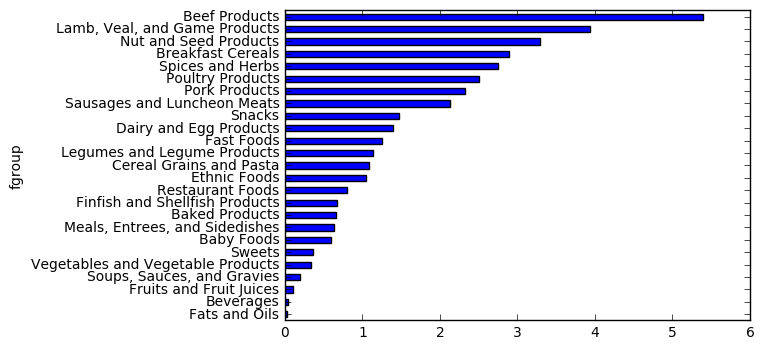

In [29]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)
result['Zinc, Zn'].order().plot(kind='barh')

In [26]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAvwAAAFeCAYAAAD5ZMv3AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAAPYQAAD2EBqD+naQAAIABJREFUeJzsnXmcX9P5x98fEUYoqinaX4XYp6pIUHtsRW3VTU2F2FutPZqqIkFttUTQqjWWMNrY1VJFaqvSRhA1Yslil4xlsiPJ8/vjOd/kzs13me9kmZnM83697mu+95xzz33O/X7Fc859zueRmREEQRAEQRAEwZLJUm1tQBAEQRAEQRAEi45w+IMgCIIgCIJgCSYc/iAIgiAIgiBYggmHPwiCIAiCIAiWYMLhD4IgCIIgCIIlmHD4gyAIgiAIgmAJJhz+IAiCIAiCIFiCCYc/CIIgCIIgCJZglm5rA4Ig6DxI+gqwOzAemNm21gRBEARBh6IGWAv4u5l9VM2F4fAHwUJC0gbADcCmQIOZ9Wpje9YExgGbmtlLbWlLht2BW9raiCAIgiDowBwI3FrNBeHwB0s0koYC/TJFHwP/AQaY2eiFfLszganAesC0CvYYMAt4C7gRONfM5ixke0j3WWhIGgcMNrPLWtnFeIBhw4ZRW1u70Oxa0jnxxBMZPHhwW5vR4YjnVj3xzFpHPLfqiWdWPQ0NDfTt2xfS/0urIRz+oDPwIHAIIGB14BzgPvy12MJkHeBvZvZOC+2pAb4H/An4Argg31DSUoCZWWsdd7XyukXFTIDa2lp69WrTFyAdipVWWimeVyuI51Y98cxaRzy36olntkBUHRIbDn/QGfjMzCalzxMlXQA8LukrhRg4Sd8ALgZ2A2YDTwHHm9mEQieSjgBOAnrioTKXm9mVqW4OvpreW9IZwJlmdlYL7Lla0o+AfYELJB0CDAYOBs7H3xasK+lt4HTgSOCrQANwipn9PWPflsCfgVpgNHBu9qaFvs3sy5my7wN3mdlSmbJ90r02xt9YPG5mP5Y0AlgTGCzpUnwi0kVSD+AKYDtgmfRsfm1mD5UYPw0NDaWqgiI0NTXx/PPPt7UZHY54btUTz6x1xHOrnrZ8Zt27d6dHjx5tcu+2Ihz+oFMhaQWgL/B6xtlfGvg78DSwLe7wnwY8JGljM5sl6UBgEPAr4AVgM+AaSVPN7Gb8zcGj+Or9Rbij3FJmAKukzwZ0AwYAhwMfAROBE4ATgaPS/Q8H7pX0TTN7U1I3/K3F3/HYvp7AZTQP6TGKh/jMLZO0F3AncDZwEO7A75Wqfwi8iE8qrs1c/yf835LtgOnANyuNP72SDKqgd+/ebW1ChySeW/XEM2sd8dyqp62eWU1NN8aMaehUTn84/EFnYB9JU9Ln5YH3gL0z9T8FZGZHFQokHQ58AuwIPII7+/3N7J7UZIKkjYBfADeb2URJs4CpZjaxpYZJ2hXfyDokU7w0cLSZvZxp1x8438yGp6JTJO2ETwSOxScxAo4ws8+BBklr4M54NZwK3Jp7OzEawMw+kTS7yBjXAG43s1fS+fjKtzkb2LNK0zozJ+IvfoLqiOdWPfHMWkc8t+ppq2fWwMyZfWlsbAyHPwiWMB7DHXPhK+m/xFfvtzCzt4FNgPUyk4ICywLrSPoXHp9/naTsynYX4NNW2FOYgHRNNt2Kb/gt8HnO2f8S8HXgX7l+nga+nT5vCLyUnP0Cz7TCtk2Bq6u85jLgSkm745OjOypviO4JROxmy/kF8bxaQzy36oln1jriuVVPPLPFSTj8QWdgmpmNS5/Hplj8Jjwe/gxgBeC/wM+Yf5PrpFQPcATwXK5+divsKUxAvgDeK6LOM6PEdflwHGXKVKQ+zxzmH1/XFt67JGZ2naSH8NCf3fC3D/3N7I+lr7oY+EuurC4dwfzEc2kd8dyqJ55Z64jnVj3xzMpRX19PfX19s7KmpqZW9xcOf9BZmQMslz4/D+wPTDKzYrHnUyS9C6xjZrcthHtnJyAVMbMpkt7DY+SfylRtAzybPr8CHChpmcwq/9a5riYBX5K0nJkVHPvNcm1eAnbBpUKL8Tn+ZiNv47v4m4GrJZ2LT6bKOPz98a0GQRAEQRDkqauro66u+aTo+eefb/W+h3D4g87AspJWS5+/jMe8L49vcgVPBHUycI+kgcA7uGTnD4ALzOw9PIZ/iKTJwEN4uM/mwJfNbHEEIV4IDJI0Ft+0exgeivSzVH8r8HvgWknn4TEz/XN9PItvqj1P0mXAVjTPUQAeWvRIus9t+BuAPczswlQ/HthB0l9wtaGPJA3GNyu/hodM7YRPQMowDp9nBUEQBMHipHOqxIXDH3QG9sA36gJMAV4FfmxmTwCY2QxJO+A6+HcAXwLexVV3Jqc210mahqvn/AFPrDUauDRzn4Wa5CrHZcmui4BVcYd6HzN7M9k3Lclp/hn3pF9Jtt4x1zjfdNsXnzwcicfbDyQTs29mj0v6CS7L+Rt8/E9k7Dgj3eNNXMGnSzquAL6R2j+Iy5eW4fR0BEEQBMHipaamG927d29rMxYran0+nyAIguqQ1AsYGZl2gyAIgraio+rwZ0J6eptZVa/JY4V/ESJpHJ7o6LK2tqUlSLoZWNbM9g9bOj6SuuAbg/c2swfa2p4skWk3CIIgCBYfS1Vu0vGRNFTSnW1tR7VI6iVpTsqgWqz+UUm3L2672gtyfi7pGUlNkiZLeknSYElrt7V9xZB0dvpOZ0v6QtI4SRelxFntHklPSvpDW9sRBEEQBEHL6RQOf0clva55Ed+g2QxJPfCkUNfm6zoRf8X1He8BdsUzvB6JK8n8tg3tqsQLeGbetYBTgKPx/QNFSSv1QRAEQRAErSJCegBJJwKHAmsDH+PqLQPMbFqq74dvzuyLO5hrAPfjCif74wouKwE3AydY840RK0q6FdgXT9J0rplVk/30OuBsSSeY2cxM+WH4RtS/JxuFZ0k9HHcmXwXONrO7Uv3SwFXAzsBqwFvAFWZ2RRW2zIekk/HnsDbwEe58/8bMpqf6w4HzgYPwlHrfwDeBHmJmk1KbLsAlqZ8vgGuYXy8+f9++wA+BPc3s75mqd5gnVVlouyVwDi5BuTS+qfVEM3sxc/8vgKNwZZ4dcRmZQ/Fsu9cBvYFRQF8zm5Dp+4fAaUBtuveN+Hec19bPMqswduAvknbDfx/Hpsy7DwPfA84FvoWr3vxL0q/wzbD/B4zFv9+5Ir2S1k+2bg68QW7jrKRdgH8AK2S+n97Af4BvJDUiJG2PK/5sDnwG/Bv/nV8JbAtsk753w/9bmIFLcO6K5yx4C/i9mQ0r9QAaGjqnSkIQBB2fjhr/HXRyzGyJP4ChwJ1l6o8D+gBr4s7eK7gzXKjvhzs+D+GZTbfDNc0fAurxLKd7AjOBn2SuG4c7+b8G1gWOwR3LXaqw/cu4Q9U3Vz4WOCtzPhBXjdk5jeOQdN3WqX5ZXGFls1R/IDAV2C/Tx83AX6t8tscD2wM9cMf0VeDSTP3h6bk8iGdx3Sy1GZppc2p6nvsAGwDX44mxStoC/A3PLNsSG3fBM3ysm76r63AVnuVSfRdcl3887vCvC9wNvI4r2eycrnsWuCfT7474BPHA9Ex3Td/5b8vYcjbwXK7sCuD9jK1zgJHpefbEJ5M/Sc/xiGTfycAsYNt0nXCtsQeAjYAd8AnKbHxSVOh7NtAtc+/eqezrmfOZ+AT3W/hbk2OAlYEVcef/ClwpaNV03z/jCck2S7+DnYHvlRh/L3yiEEccccTRIY+amm42YcIEC4LFzciRIwu/w15WpS8cK/yANd9UO0HS6fhq5jGZ8qWBX5jZeIAUO98XWNU8idGrkkbgTtrwzHVP2zwN8yskbQuciEs+tsS2TyTdja/oD0v33hl3rG5I5zW4BOMOZjYyXXqDpD7Az4FnzOwz4KzcOLfDV27vboktJewbkjl9K+nYDwZOyJR3BY40s3eSvX/EJ0EFjsdXq+9L9T8Hdq9w6/XxcKe5SLocn+iAJ9FaO9n4aK7dUfiEYnt8Nb3AtTbvjciFwJPAIDN7LJVdhv8uCgwEzjGzW9L5BEmD8Od8XgX7C7ZsDhyATx6z/M7MRmTa9QeuMbNCCNdFkrbGHf+n8TcCPYHtzawxXXMa83INtJQBwL/MLPv9zdXUl/QFMN3MJmbK1gBGmdmoVPRW5ducjc+RgyAIOhINzJzZl8bGxljlDzoU4fADKYziFHwVd0X8uSyby0g6veDsJz4ExmfqC2Wr5rp/psj58VWaeB3wkKSe5hlaDwOeMLOxqX59PGvsiBTaU6ArHq4BgKRj8bcVawI1uI76f1gAUjjKb/CV+ZXw1fJlJXU1sy9Ss8kFZz/xPuk5SVoF+Cq+QgyAmX0haSSVsdz5IHyysT+ZcBZJq+MhKjuk+3bBx5//13p05vOH6e/LubLlJdWYh1d9G9gyOfkFugBdc+PP00vSFPx3tjRwL80nSIav8GepBYbkyp7Gw5DAf7vjC85+Iv/bawmbAjdVec2fgOFp8vIP4C4ze7b8JT3xxf4gCIIgCBY1nd7hl7Qmvgr6Rzy05GN85fda3GEuOPR5581KlLVkI3TeUS3f2OwRSW8Dh0i6CA87OTLTZIX0d3fmOaoFZsLcmPfzccfyOTwB1W/xbK2tIinh3IsnhToFj3ffEd8r0JV5z6fcc1KmrBpex53ceZ2afQR8JGlSru0wPLPusfjq82fAf/EJT5asnVamrGD7Cvhk5968cWWcfYD/AfvhoTTvmdmsIm2mFSnLPyNlylSkPk9hX0F+UphlBlViZvenTeR74WFNIyRdamanlr7qYuAvubK6dARBEARB56a+vp76+vpmZU1NTa3ur9M7/HjM8lJmdnKhQNIBC7H/rYqcv9qKfobi8fDv4w7rHZm6l3Flmh5mVmpVdxv8rcA1hQJJ67bCjiybA3PMbECmz77VdGBmBQd9K9Jm27TBuBfwrzKX1gM3SvqemT1Y4TbbAIda2twrqScek17RvAr1o4ANMm9aWspn6U1NNTTge0duy5Rtw7wc4a8APSV1z6zyb03zMRQmQl/DN/WCx91neQmP9T+nhB2f428xmpHueSP+nTyDhzWVcfj741sfgiAIgiDIU1dXR11d80WwTOKtqulMDv/KkvKr2R/hjs/Sko7DV/q3w+PeFxbbJkWTe4DdgB/TuuDlofim23OA+hSTD4CZTZY0GBgiqSvuKK+Ej+XjFGP+OnBACl+agMe6bwa81tqB4c9u2aQe8wAeMnNk+UuKMgT4naSxyZ5fA1+qcM0t+JuO4ZLOw0NJPsRjRX6Cr54XeB04WNILwCq4BGZLVrLLKgUBZwJ3S3qXeROwTYBaMxvYgv6r4UJgmKQXgRH42PfFnzm4WtM44CZJv8HHeVaujzG4stOZaa9FLc1DicCVgV5I+xWuxp/jTsCtZvYpvrF5q7SiPw1/I3YW/tboFTy0bE8ycf/FGYeLJQVBEHQkQmEs6KBUu8u3Ix64szy7yHG1zVOaeQdXrXkAX3qcDayY6vvhjnO2z4HA80Xuc2fmfCwu2Xhb6vtd4Fe5a24AHmvhOB7ClVl6l6g/Hne0ZgIf4NKh26S6ZdO9PgYa8TCc88koxpBT6cEVYb6oYNNJaVxTceWcg8goweBvJSbmrvkR8HnmvAvu9H+SbDs/b0uZ+/8cj1WfjDvxr+Mx5etl2myGO6TT8X+t98NDe36Zuf9cNZtUtk4q+2amrJjKze54LP20ZP8zuORoKXvnU+nJ1c93j0zdL/FJ1sz0Pf80V78+vtF4Rqrfrci4tsM3O0/DJw4/JqPSk9r0AZ5Kz6sxfa8rpLoN8AnltMJ1+ET0f+k3MAm4HX/bVGx8odITRxxxdOgjVHqCtmJBVHpk/j/hoI2Q9E/gUTM7u61tySPp98CWZrZbW9sSLBlI6gWMHDZsGLW1tW1tThAEQdWEDn/QVmRCenqbJ2dtMZ0ppKfdIWlFPGFVe9Un3ANf5Q+ChUptbS29eoVKTxAEQRAsDlqiKBMsIsxsspn1sJT1tL1hZpub2QttbUcWSf0kfdLWdhSjvdkmaaCkUZVbBkEQBEGwJBMOfydA0g2S5kgakCv/vqQ5pa4r0ddQSXcuXAurpmwcmqQ+kh6V9JGkaZJeS3YvjjdalWybkzk+lfSUpJ3ayp5qSM91TnozFQRBEARBByFCejoHhm/k/I2kq8ysKVe3xCCpFngQ3wR8LD7u9fCNwl3wTc9tTT9cVac7rorzN0kbWfPEbgBUSOC1uClo/VdSL6pIQ0MoXQRBZyNi34OgDal2l28cHe/A1YPuwZVULsiUfx+YnTkfCIzKXXs8MC5TPwdXZyn83aHEPXfHFWMKyjv3AWtn6tdMffwAeAxXfXkB2CrXzyG4jOhUXPryJHKKSUXsfbMFz2Q74AlciWYCPkHIqu8sA1zEPPWmZ4A+C2JbumYOsG/m/Gup7Mh0PgK4HM8YPAnf0A2wRvoOpwBNeNaqVXN9n4KrMzXhiePOI6Mklfq+JHfNXcD1uXFfgKsYzcSlPA/NfF/Z7/76dM2Pcf3+gqrPw8ByJcYfKj1xxNFJj1C3CYIFY0FUemKFv/MwG0+EVC9piJm9V6KdlSm7CNdu/xLu7AqX+SzG8ng61ZfwjLRn4c5lPhfC7/EsTG/gq923SlrXzOZI+g7uuP4Gd3b3YH5t+TwfAF+TtL2ZPVmsgaR18LcAp6ZxrApcgTvah6dmf8Qz+e6PJzv7AfCgpI3N7M1W2laMmelvNuPtwcCVeGKtAgVnf/vU9kpc7nXnNKb98QnZ0bhM6MHAccCbVdpzM/Ad4Bj8u+uJv4l4C39Lcjv+xmQKMEPS6sCtwMnA3fhvY3sqvgU4m/a7Vz0IgoVPAzNn9qWxsTFW+YOgDQiHvxNhZvek5FNn0ooEWWY2TdIMYBkzm1ShbbM4f0lHAh9K+qaZZZMyXWhmD6U2A/GsweviCbiOAx40s4tT2yskbYu/PSjFcFx//p+SPgT+DTwK3GRmU1KbU4BhZnZ5Oh8r6YR0zdHA6vhEYA0z+yC1uUTS9/DV7tNaaVszJHXDJzyzgMczVW+Y2SmZdt8FvgWsVZioSToI+J+k3mY2En+zcY2Z3ZAuOz0lWVu2CnvWx5OW7WJmI1Lx+Ex9YXI3ycwmp7J18VCpu8zs7VT/v8p364kv9gdBEARBsKgJh7/z8RvgUUkXV2y5ACRH8Cx8tbg7vkHcgB40z8I6OvP5fXxleFXc4a8F8huEn6GMU21mc4DDJZ2Gr35/B1/J/42kLczsQ/wtw8aS+mZNTn974km3ugCvScquVC+Dh9nQGtsy1KfN0ssBE4HDzCzrJP83135D4O3sWxkza5D0abJjZPp7ZRF7dmyBPQU2wScfT1RxzYv4hOplSX/Hw3luN8/KW4aL8aikLHXpCIIgCILOTX19PfX19c3KmpqaSrSuTDj8nQwzezI5ZufhmXezzGH+UIyutI6/AeNwHf/3cIf/f7jTnCW7IbUQOlRQjxLFQ4wqYmbvA7cAt0g6Hc/A+wv87cYKwFV43H5+vG8xz/HthT+TLFMX1DbgBNxJbjKzj4rUT8udl7pXvrySPZW+3xkVrp+PNMHaTdLW+JuVY4HfS/qOmU0ofWV/PKF1EARBEAR56urqqKtrvgiWSbxVNSHL2Tk5FdiH5jHi4KvXq+fKNsudf46vfpdE0irA+sDvzWyEmY0BvlKkaSUH9RVgq1zZ1hWumf8mrkr0Pr6vAOB5YCMzG2dmY3PHLGAUPsbVitRPXAi2fZj6KubsF+MVoIek/ysUSPomsBLz3pY0FLEnfz4J3yRc6GMpPFSowGj834Q+Jez4PP2d7/s3s2fM7Ez89/IFvuchCIIgCIJ2QKzwd0LMbLSkW/DV2Cz/xGPRB+CbM7+Hb0bNvkMaj6/org98hK9S56UuP0l1R0n6AFd4OY/5HfxK8o6XAU9J6s+8jbFlQ2YkHQVsim8QfhOowWUwvwn8KjW7AHhG0uX4xttpwEbArmZ2rJm9LulW4CZJJ+MTgFXxEKEXzezB1tjWWszsEUmj8bcVJ+Kr8n8ERphZIbHWEGCopJH4pt2+aUzZTbuPARdL2jOVnwSsnLnPBEk3AddLOh4P11kTVwMajisSGbCPpAfwNwIbAbvgoTwT8UlGd5qHbRVhHD7vCoKgcxBSvEHQplQr6xNHxztwWc47c2U9cIdtVq78KNypn5yuOwUYm6nvDjyU6svJcu6Mb8CdjjvM26f2+6b6NdP5tzPXrJTvk+bSl3cDJ1JelnNT4EZc9Wc67oSOAPbMteudxtGUxjIKOCVT3wVXvXkTV9J5F58EbdRa29I1c59BifrHyElnpvJv4JOYycCnQD3w1VybU4AP05iuZ35ZzqVxNaJJ+BuPAfg+hLwsZ0GOdAYuy9kvU/87PERrVrrHBrji0QfpeTcAR5cZX8hyxhFHJz1CljMIFowFkeWU+f+EgyAIFjmSegEjhw0bRm1tbVubEwTBYiQSbwXBgpGJ4e9tZlW9Jo+QnqDTIakPvuq/siV5ySJtNsA3NW8KNJhZaEgmJPUDLjWzL7e2j9raWnr1ikcaBEEQBIuD2LQbLHYkDZU0J3M0SnpQ0saL0YxKr7bOxEN11sNj1BcISf0kfdLCtl0lDZD0gqRpkiZKelLSIZLKbphejMSrwSAIgiDoIITDH7QVDwKr4apAO+Mx4feVu0DS4nwjtQ7wlJm9Y2YtctQr0CIZT0ld8Q2wA4A/48o/W+KbdI/BN8m2zoD2M1kIgiAIgmAxEiE9QVvxmc3L1jtR0gXA45K+YmYfSVoTl3I5APgl7vT+AlfO2Q44F9gc34B6N/BbM5sOIOlAXOt+A1yB5zHgBCuRHVjScvjm1RWAvXGVIQN6SzoDONPMzpJ0Pi43+Q18k+otqW526ufbwKXJLsOTh/0c+BK+wdVSwi0r9FnEnBOB7fD4vJcy5eMlDSflMUgJwU7BMyavjm+u/b2Z3ZHqC2FLe+LZfL+F6+Q/Ien7wBm4ctG7wE3AOZlxnIhnFF4b+BifiA0ws3x+gMLzKzrucvGFDQ2h2BEEbUHE0QdB5yQc/qDNkbQCLiP5us2vTX8enqVpFDBT0tr424FTcZWcVXHlmcuBw9M1XYHTcCd4VeASXHFo7yL3XhlPEjYZ+K6ZzZS0Op4Y60FcsaaQbGsycDCucLMxcE0quyjV34JrTf4cT3K1Ka5J/zQ+ATkTz0+gTJ95fgY8knP2AUgOeSE51qmp7VG4ItEOwM2SJprZk7nndzIwFvgkTZZuxN8WPAmsC1yNO+pnp2tm45Kt4/HMw3/CpUyPKWFzqXGXpG/fvuWqgyBYRNTUdGPMmIZw+oOgkxEOf9BW7CNpSvq8PC71OJ9DDgw2s7sLJ5KuAYaZ2eWpaKykE4B/SjrazD43sxsy149P9c9K6lZ4C5D4GvAXfGJwoKV8AmY2UdIsYKrNS7SFmZ2bufYtSRcDP2Wew98D+IOZvZ7O52rgS2ryLoq/ZciwHr4yXxJJywC/BXYxs2cz49wed7qzDv/pZvZo5tqBwHlmNiwVTUhvMf5AcvjN7LLM9RNSpuIrKe3wlxx3ac7GXz4EQbD4aGDmzL40NjaGwx8EnYxw+IO24jE8REfAKnjYzkOStjCztzPtRuau2wTYWFJ2ibiQwKsnMEZSb1xDfxPgy8zbq9IDeDVzzT+AZ4EDrAX6tJJ+iq98r4OH/yxN86RklwDXSToYeAQYbmZjK/Wbvw2VY/3XBboB/0ihPQW60jyblVH8+W0j6bRMWRdgGUk16Q3Hrni40IbAivg4l5W0nJnNYH5aMe6euCR/EARBEASLmnD4g7ZimpmNS5/HSjoCd56PxOPL57bLXbcCcBWeWTafqfctSd3whFoP4iEvk/AkXw+R4t8z/A34Eb4R9uVyxkraChgGnI5vqm0C6vBstQCY2Zkpg/Fe+PL1mZJ+amb3lOs7x2tAJYH6FdLfPfE3I1k+y50Xe35n4HsWmpGc/TXxmP0/4mFDH+NJ067FJxTzOfxFxj1I0gHlx30x/nIlS106giAIgqBzU19fT319fbOypqamEq0rEw5/0J6YAyyXOS+20v08nu12XJG6wgbSVfBNvO+msi2LNDV8FXsa8KikHc2s3E7SbYDxZnZ+5l5rzdep2Rv4ZGSIpFvxza/3AJ/jK+mVuBU4R9ImZvZibmxd8EnLK7hjv6aZPdWCPrM8D2xQZgW+N7CUmZ2cue8BlTotM+4S9AcObLnVQRAEQdCJqKuro66u+SJYJvFW1YTDH7QVy0paLX3+Mh4qszxwb6ZNfgUffPPoM5Iux1edp+Er9Lua2bHAW7hzfZykP+Oba08r0o8AzOzXyZF+LDn9Y0rY+zrQI4X1/Affb7Df3M6kGuBC4HZcXWgNYAtgeGoyHlhB0s7Ai8D0EuExl+Kr5I+m2PqngCmprwHAYWb2kqSLgMHJ9qeAlYBtgSYzu7nM8zsLuE/S28nWOXiYz7fM7HR8A/DSko7DV/q3w/cFFKUF4y7BOJpHHwVBsOgJdawg6KyEwx+0FXswLxxlCh5b/+Ocwsx8K/xmNjpJTp4DPIE7tW+S4kPMrFHSIbhs57G4V9mf5hOJZn2b2UnJcS6s9L+Rv7eZ3SdpMK4GtCxwP+48D0pNZgNfwRVwVgMagTsK9Wb2TJqA/AV/A3Fmuj4/vs8lfReX5zwKd6an4/+nvpQUemRmp0v6EH9LsTbwaRprdmNxsef3sKS98bCeAbiazqv45Ik0mTgp1Z2bnvEpuHRnMcqOuzSnpyMIgsVJTU03unfv3tZmBEGwmFEL9ioGQRAsFCT1AkYOGzaM2tpKWxWCIFjYhA5/EHRcMiE9vcvluilGrPAHQbDYqa2tpVevUOkJgiAIgsXBUpWbBEH7RtKakuakDbtLDJL6pHGt2IY29JP0SVvdPwiCIAiCBScc/qBNkdRd0pWSJkiaKel9SQ9K2rqKbt4CVqeCtGYHpWzMnaRxaYNtvnygpFGLw4YgCIIgCNo3EdITtDV34r/Dg3DpltWAXfCNoC0iJc2aWLFh52OBHHVJi+zfh4aGUAsJgoVFxOUHQVCJcPiDNkPSSrjsY5+MOs/bwH9z7ebgmXj3BXYE3gcGmNkdqX6Gw4/3AAAgAElEQVRNfLKwqZm9lMq+iUt47oAr+YwCDino96dEXyfhKV/HAZeb2ZWpriswGPghLhn6PnCVmV1QYhyb44o2m+HJqV4ATjSzUZk2c/CkYnsBuwPvAv3N7L5Mmz3TfdcAnqG0Mk6rqDDmwjM8AH/WW+KZkAvXfh9XDFoDeBw4wszeSXXfxhWENscnGa8BPy+3oahv376lqoIgqJKamm6MGdMQTn8QBCUJhz9oS6amYz9Jz5rZ52XangX8BjgOOBi4TdK3Mrr5c1ezJX0dl5N8DJ8gTME16pdO9QfispG/wp3zzYBrJE1NGvbH4zr7P8YnIGukoxRfAm4AjsEnF/2BBySta2bZTLdnAL8GTk7juEVSDzP7VNI3cDnLy4FrcOf5kjL3rEQzDf4WjLnAecn+UcBMXD51eTzrbl9cxvNKoB7PwAtwCy4J+nNc13/T1K4MZ+PpBoIgWDAamDmzL42NjeHwB0FQknD4gzbDzGZL6oc7uEdLeh5fPb7NzEbnmv/VzIamz2ckrfpjcScbmju4x+C69HVmNjuVvZGpH4SvrhcywU6QtBHusN6MO/evm9m/Uv3bFcYxInsu6RfAT4E+wAOZqqFm9tfU5tRk/5bAw/iq+htmNiC1fT2tnA+gMhdIOidXtgzwv8z5IIqP+Rf4mAsMNrO7M2MB/3fiV2b231TWD2iQtHkq6wH8wcxeT5e9WdnknkCo9ARBEATB4iAc/qBNMbO7JN2PrxZvBXwPGCDpcDPLhrT8O3fpM3iG2GJsAjyZcfbnIqkbsA5wnaRrM1Vd8EkC+Gr9PySNAR4C/mZm/yg1Bkmr4onA+gCrpr6Wwx3hLHMnMWY2XdKU1B5gQ+DZImNsCRcmm7McT1qBb+GYC4ws0v+sbLmZjZH0KVCLh19dkvo+GHgEGG5mY8ubfDEpV1qGunQEQRAEQeemvr6e+vr6ZmVNTU2t7i8c/qDNSaE8j6bjHEnX4JloK8Wwl9qUOqPMNSukv0cAz+XqZid7RklaC5987Ar8VdI/zGz/En3ehMf6H4srBn2GT1CWybXLh7kY85SyROs32TbmHWxJH2dOK445wzSKYMUz9FmqO1PSLfj+hD2BQZIOyLxNKEJ/4MDS1UEQBEHQiamrq6OurvkiWCbxVtWEwx+0RxqA7+fKtgKG5c5LbQp9CThYUpf8Kr+ZTZT0LrCOmd1WygAzmwoMB4ZLugN4UNLKZpZfEQfYBjjazP4OIGkNoNrc9a8A++TKqpEmLUlLx0zpCcfSmfAdJG0ArAy8mrnHG8AQYIikW4FDgTIO/zhKf31BELScULwKgqAy4fAHbYakVXCn+nrcSZ8CbIFvbL071/wnkkYCT+GbR7fAncpiXIHH8f9F0nlAEz5BeDbFmQ/CHdPJeMjOsvgm2ZXN7FJJJ+DKPC/gTvD+wAclnH2A14GDkn0rAX8AplfxKAD+DJwk6Q/AtcmeflX2UY5BlBlzaqMS184CLpd0fOEz8C8z+6+kGjyk6Hbci18D/26Glzfn9HQEQbCg1NR0o3v3atcYgiDoTITDH7QlU/HQlxPwGPOu+AbZq3C1mCwDccnIP+LO+AEZhR7IrE6b2ceSdsYd0X/iYSsv4JMFzOw6SdPwDbF/wMNYRuPSkgW7fgOsm679D+UlZQ4DrsaXrN/CFW0uyrUpGRKTbHpb0o9wWc5j8NCb3+KToXK0KAyoBWMu19c0XOL0VqCggHREqpuN50y4Ec+h0IirDQ0qZ8+wYcOora1tielBEFQgdPiDIKiEiofmBkH7IWnY72dm97a1LcGCIakXMHLkyJH06hUqPUEQBEHQUjIx/L3L5bopxlKVmwTBkoukNSXNSRKYSxySRkhaED3/IAiCIAg6OOHwB+0WSUPT6r6AOyS9Luk0SQv7d5tN2tUnTQBWXMj3yPc/O/39QNLtknouivstbCQNlDSqcssgCIIgCNoL4fAH7Z0Hca36tfGY/EH4pt6FiXKfjdIbWL2R1HUB7mfA+sDX8Gy+GwH3KmW5KnKv9rbXJuIAgyAIgqAD0d4ciSDI85mZTUqfr04bW/fFN5GSzs/EN9i+D1xuZnNDWIrF/0v6BDg+l9gLSWsCj+EO7SeSDLjRzA6TNAJ4GVep6Qu8JGk8sKqZ7ZPpY2ngPWCAmd1QZlyTzGwy8KGks3DJ0XXxDLtz8My73wN2wTfZniWpT/q8CfAxvlH2d2Y2J927G6728wNgMp7dqhkteR6S/g/fdLwbrubzCvAr4Jv45mlL/RhwqJndJGkQrppU2Lh7u5mdUGrwDQ0hJRh0bmKjbRAEi5Nw+IOOxgxgFQBJvfF0rWcAf8X18K+U1Jh35lvIW8CPcInJ9XCZ0GwSr4OBK9N9wLX2H5e0mpl9mMr2AWqSPS1lZvqbTdQ1EDgFz5g7S9LXgftx1Z6D8My81yb7zkrXXIRn190HmIQrHfUGWhyCI2l5XIXnbWBv4EOgF/428DbgW8Du+EREQJOkH+NKS/vjk4PVKZ0FGYC+ffu21KQgWCKpqenGmDEN4fQHQbBYCIc/6DBI2hV3NoekohOBR8zs3HT+hqSN8JCfqh1+M7NMhtrCCnyWN8zslMz565Jewx3wggznIcBwM2uRDr+krwEnA+8CWZnRW8zsxky7c4C3zOy4VPSapIHA+fjq//K4POjPzOyf6Zp+wDstsSPDgbjMZi8zK+TwnpvFV9JUYFbmrUsh0dj7wKMp0dk7wH/L3+ZsyiudBsGSTAMzZ/alsbExHP4gCBYL4fAH7Z19JE3BNfqFa8GfmepqmT9B19PA8ZJkC19ztpgTey1wJHCRpNXwMJwdK/Qj4J20+Xg5PEfAj8xsVqbNyNw1GwLP5MqeBlaQ9A38rUdXXL8fADP7RNIYqmMTYFTG2W8Jw/EV/nGSHgIeAO7LZzluTk/8xUEQBEEQBIuacPiD9s5jwC+AL4D3CvHqicIGW3JlWYptwG3thttpRcpuAs6T9B1gO2Csmf2rQj+W2k4BJppZsX7zZeXGarnPle5d7nnMoErM7B1J6wPfBXbFk6OdLKlPaaf/YjwaK0tdOoIgCIKgc1NfX099fX2zsqamatbimhMOf9DemWZm40rUvYI7zlm2BV7LrO5PwtVwAJC0HtCtzP0+T3+7tMS4lNX3bjycZmtgaEuuA8YXCRkqxyvAD3Nl2wJTzOxdSZ/iG4q3wjPdIunLuBrQPzPXVHoeLwGHS1rZzD4tYsfnFHk2ZvYZ8Dfgb5L+BLwKbIy/vShCfzx6KAiCIAiCPHV1ddTVNV8EyyTeqppw+IOOzMXAc5JOw5eLt8HVZH6RafMYcIykf+O/9/OZ59QXYwK+Cr6PpAeAGSVW4LNchzu7S+HKOZUoK/lZgj/hoUqXA1fgIT6DSEo8ZjZN0nXAhWkfwiTg90B+hb3S86gHTgXulnQqHpu/GfCumT0LjAd6StoEj9Wfgi/LdwGeBabjexqm48+yBOOAqpIEBsESRKhUBUGweAmHP+iwmNkoSfvjKjWn4c7paWZ2c6ZZf1zZ5glcLvN45g8enxsGY2bvZTbDXo+H7BxWwY5HJL0PjDazD1pierX1ya498VwEL+CynNcA52Sa/RpYHrgXd8QvBvIJxMo+DzP7QtJ307X34/9GFGQ5wd8e/AAYAayES3F+iisKXYw7/qOBvc3sk9JDPD0dQdA5qanpRvfu3dvajCAIOgla+Psag6BzkfTv3wP6mdk9bW1Pe0ZSL2DksGHDqK2tbWtzgqDNCB3+IAiqJRPS09vMqnpNHiv8QdBKUqKuccANwCfAfW1qUBGKJdpqD9TW1tKrV6j0BEEQBMHiYKm2NiAIFjWShkqaI2m2pM8kvS7ptCSLuSD8Hx6PvweecXZOhfZIGpix5QtJ4yRdknT02z2SRki6pHLLIAiCIAjaC7HCH3QWHsSTYtXgWvl/wqU+L2hNZ5K64smyDNjDzF6q4vKX8Uy1XXGlnaG4Hv/RJe7VpbymfRAEQRAEQWnC4Q86C59lssNeLelHwL4khz+dnwmsi2/+vdzM5q5kSxqHq/GsB3wfuJN5CcAKbZbCE3FtBXzXzN4tYUs2U+3wlEF4X+BoSTviSjp74io73wJ2A56QdDS+6XYNPPvtOWY2LHP/dfENuVsAb+LJsLL29cE3265ckARNajujgLXM7K1Utm2695bAZ7j6zgHApUAfYAdJJ+CTnZ7AZFx7/7vACsDbwLnZTMF5GhpCpSRYMohY/CAIOgLh8AedlRl4dlok9cZlPc8A/orLe14pqdHMbspc0x9XBBqU70zSMsBtQA9gOzP7uApbZgLLpM+FXfTnASfjjv0nkn6AO9zHAY8C+wBDJb1tZo9LEnAXPlnZAlgZGML8ij/FdunPLZO0KfAIPnE5Dtf23wlX3zke1/UfjT8rgEbgMlwmdHfgI3zStFy5Afft27dcdRB0GGpqujFmTEM4/UEQtGvC4Q86HWlFfXfcIQY4EXjEzM5N529I2giXucw6/I+a2eBMP2vizvKXcAnLrsBOZjalClt64Tr2j+aqTjezRzPt+gPXm9lVqWiwpK3wScHj+Or6+sCuZvZhuuZUPJSpGn4N/MfMjs2UzV2Ol/Q5MN3MJmbK1gBGmdmoVPRW5ducjb/ECIKOTAMzZ/alsbExHP4gCNo14fAHnYV9JE3BnXIBtzIvJKcWuDvX/mk80ZUyWXtHFulXeLKqt4GdU8bZSnxb0mT8v7+ueNKurINtRe5VC1yVK3saX4UHX2F/u+DsJ55pgS15NsXfclTDlcAd6U3Jw8DdZlbh3j2ZPx1CEARBEASLgnD4g87CY3gG3i+A93KKOmL+UJdi2XBLZdy9H+iLhwKNaIEtr+IhObOTLbNaeK9iNlqRz6Xaz8m0LdA112ZGMYPLYWYPSeoB7AXsCjwq6QozG1D6qovxKKosdekIgiAIgs5NfX099fX1zcqamppa3V84/EFnYZqZjStR9wqwXa5sW+C1zOp+KQxf4f4fcK+kvczsiQrXfF7GllI0JBuHZcq2YV64zStAD0mrZVb5t6G50z8Jd/a/BhT+1dgsd5+XcAWhMynO53g8fzPM7CM8/OkmSU8BfwDKOPz9gQNLVwdBEARBJ6auro66uuaLYJnEW1UTDn8Q+HLzc5JOw5edtwF+hb8RqIQAzOwKSV2A+yTtaWZPL4A9xd4uXAj8RdIoPN5/X+AHuHMOvtH2ddzh/jWwEq60k+UNPPRoUBrrBsBJuTbnAS9J+iPwZ/yNyI7AX9NG5PHAd9L+hanAx/gm5pH4pKcG2BufgJRhHFBVksAgaIeE2lQQBB2DcPiDTo+ZjZK0P67AcxqudHOamd2cbVbq8kw/Q5I05/2S9jCzf7fWpCI23iPpeHyT7hDcYz7EzJ5M9SZpP1w69FncMT8OeCjTxyxJB+BvJF4E/gP8DhieafO6pN2Ac1M/M9LfW1OTi/DMwq/gzn1PfNX/XGCt1P5JKsbmnJ6OIOjY1NR0o3v37m1tRhAEQVlUOWIhCIJg4ZBUiUYOGzaM2tratjYnCBaY0OEPgmBxkQnp6W1mVb0mjxX+IAgWO7W1tfTqFSo9QRAEQbA4WKqtDQg6L5KGSrqzre0oh6SBKW4+CIIgCIKgQxIOf0JSd0lXSpogaaak9yU9KGnrtratsyKpj6Q5klZsY1PaZdxbmozMkfRAkboBqe6xRXDPmAAFQRAEQQciQnrmcSf+PA7CN0SuhiugfKUtjQrap7Pdjngf2EnS183svUz5IcCERXTPBf5OGhpC3SRoP0QcfhAESzxm1ukPXMJwDrB9hXYn4jrlU4G3gD8Cy2fqBwKjctccD4zLnO+Iq55MBT7BFU3WSHVr4xlfPwCmAM8Bu+T6Wx1P9DQdeBNXQxkHHJcbz7XARFxv/RHg25n6b+OJqCan+v8AvRZg3P3SWHbD1VumAA8Cq2XaLAVcktpNAi7A1V7uLHPfPnhyqhVL1I8ALsmV3QVcnzkfB/wWV6+ZjDvBR+au+T88W+5HaYzPAVtkvtPn8cRa44BPU9vs+JXuMTZ9L6OAHxUZy7PATOA9XP5yqdxYhqTn8hHuyA+s8HscmO51D3Bqpnxr4EPgCuCx3DVHpO9oRvp7dK7+fGAMnvjrTVy5qEvme56TvpPC34NT3aD0bGcC7wCXlrC5Fz5hiCOOdnPU1HSzCRMmWBAEQXtm5MiRhX+3SvpspY5Y4XempmM/Sc+a2ecl2s0GjsUlD3sCf8IdtGMybazIdQaQdNrvAq4CfgosC2yZuWYF3Jk/FfgMOBhP5rSBmb2T2twMrALsAMwCBgNfzd3v9jSe3XEn9+d49tP1zOxT4Bbcif057rhtiuutl6Il4+7GvGxKlu5xEf7GBFxO8mB85fnVdP4DXFN+UXMSrgF5DvAT4EpJj5vZa5KWB57A9en3xh3lXjQPd1sX+D6wJ/7shwOnME9X8lTgZ8BRuNb9DsDNkiaa2ZOSvo5/r9fjz2NDfEI2A3eoCxyMT4q2xHMB3CDpKTMr94ws9XshLo0JcBj+/Jvp+Us6EHfMfwW8gCfdukbSVJsnQTo52fE+sDFwTSq7CM9R8C38d7VL6r9J0o+BE4D98UnE6sAmZWwGzsYfZxC0NQ3MnNmXxsbGWOUPgmDJpdoZwpJ64M5nI75C+xTuHG5c4ZofARMz5wOB53NtjgfGps9fxp3nsm8SctePBn6ZPm+IO+ibZerXSWXHpfPt8FX0rrl+XgeOSJ+bgIMW4Fnlx90vjWutTNnRwHuZ83eBkzLnXfC3BYtjhf+GXJsPgKPS56PwVfuVStxjIP7Golum7ALgX+nzMvjk6ju5664BhqXP5wCv5OqPBppyY3k81+ZZ4Nwyz2cgPnFbOo1pO3zi1YQ75oPJrPCn38BPc338Dni6zD36A89V+I2fiGcg6tKC305a4R9mYHHE0Q4OXzEbOXKkBUEQtGdihX8hYGZ3Sbof2B7YCvgeMEDS4WZ2E4CkXfGV3Q2BFXFHa1lJy5nZjBbc4xNJNwIPS/oHHmrzVzP7IPW/PHAmvvT5tdR/DVBYdlof+MLMRmX6fFPSJ5nbfBv4EvCx1GyBtwafHICvIl8n6eBkw3AzG1vK7haOe7qZjc9c9j6warp+xTSe5zJ2z5b031L3XMiMzp1/ULANX4keZWZNZa4fb2bTM+dzx4av/ncD/qHmD7wr81LJbgg8k+vzaWAFSd+weW9vXsq1yd6nJOYJtYbhK/vrAGPM7OWsOZK6pbrrJF2bubwLPuEptPsp/jZnHfyN09L4BKIcw/EV/nGSHgIeAO4zs9mlL7kYf2GQpY6K+bqCIAiCoBNQX19PfX19s7Kmpkr/Oy5NOPwZzEN5Hk3HOZKuwR3wmyStBdyHx6+fCnyMTw6uxZ27GfhKu3Ldds3d4zBJQ4A98LCe30va1cyew72gXfBV1TdTn3fgq8gU6Zsi5SvgMeJ9irT/NNlwpqRbgL3wycUgSQeY2T3zdSyt2YJxw/whQVbk/lbC/tZS8XknitlWCNmpOFGrcP0K6e+e+HPP8ln6K+Yfe8HubHm5+1TievyNwLfS5zwFO48gM/FKzAZIilTD8FClh3FHvw4PiSqJmb0jaX3gu8Cu+G/lZEl9Sjv9heivIAiCIAjy1NXVUVfXfBEsk3irakKWszwNwPLpcy98k+XJZvacmb2Bb/bMMgmPX86yWb5TM3vRzC4ws22Bl/H4b0hx22Z2r5n9D990u1bm0leBpSXN7VPSusDKmTbPJxtmm9nY3PFxxoY3zGyIme2Oh8EcWuIZ9G7BuMtiZpPx1eqtMnZ3SX0vCJPwNweFPpfCHd5qeAnYVNLKFVsW5xXcsV+zyPN+N9Nmm9x12wJTMm0WCDN7Bfgf8E3g1iL1E/GwqnWK2FlQ89kaf5txvpk9b2Zv0vz3B/A5/lYg3/9nZvY3MzsB2Akf78YLY2xBEARBECwYscIPSCpsxLwedwCnAFsAv8ZVc8A3Yy4t6Th8xXs7fNNrln8CV0gagG+c/R6+kt+U7rMWHjN+L74avCGwHq5WAx5j/UNJf0vnZ5FZwTazMZIexTdaHo1v2r0I33dgqc0jkp4B7pb0G+A13EHfE5cefQXf4Hk7Ht++Rhrr8BKPpyXjbglDgFMkvYFPXE6i+USlFAK+LWlKpszM7CVcaehiSXvib0Ra2meWevzNxd2STsUnJpsB75rZs5UuNrOpki4CBqdJzFO4StK2eIz+zfgm5+MlXY4r52yIb569uEpbK7ETvndjcon6QcAQSZOBh/BN45sDK5vZpfjvr0cK6/kPvol5v1wf44GekjbB1Xim4G8BuuBvGKbjG5OnU1YWdBzzIp6CoC0JidggCJZ8wuF3pgL/xuOQ18HDQt7G1XTOAzCzlySdBAzA1VCewOPabyp0YmavSvol7kCehofjXIg7+eBO0Ia4CspXcOfycjO7OtWfhMtHPo1vIL4Aj8fPclBq8zgei/5bYCNcDrHAnvhG0etxBZ8Pkr0f4uEbXwFuxHMNNCY7BxV7MC0Zdwu5GH/zcAMeinM9PgFZqcJ1ho81y2w8zOl6fM/CjcxTLMonmioWRjS3zMy+kPTdZN/9+H8Tr+BKNi3CzE6X9CH+XNbGQ6eeJ6nmmNl7aVJyIa6O8zG+qfecCnZWRdpPUTJEycyukzQN/y7/gEtvjgYuTfX3SRoMXI5PBu7HJ52DMt3cgW9wH4F/d4fi4z0Ff4ZdUp97m1l2b0mO05knchQEbUtNTTe6d+/e1mYEQRAsMmS2sMOqg8WJpG/gaje7mNmItrYnCMohqRcwctiwYdTW1ra1OUEAROKtIAg6BpkY/t5mVtVr8ljh72BI2gnfgDka+Dq+UjsWX3kPgoWOpDnAfmZ278Lqs7a2ll69ei2s7oIgCIIgKENs2u14dMVDRV7Gwys+AHYqL4EYdFQkdZd0paQJkmZKel/Sg0lRJwiCIAiCoCKxwt/BMLOHCfWTzsSd+H+nB+E7XVfDpVu/0pZGBUEQBEHQcQiHPwjaKZJWwlWR+pjZk6n4beC/mTZzgCPxnAq749Kb/c3svlS/FHA1sDO+afot4E9mdlnuXofhm8bXBT4C7jCz40rYdWa6524pwdcv8Q3va+CKVE+Y2f7lxtbQEMooHZ2Iew+CIOg4hMMfBO2XqenYT9KzKTFcMc7AJWRPBo4DbpHUw8w+xcP23gZ+jDvy2wBXS3rPzG4HSBKvF+PqPQ8xT1Z0PpK06F7AtmY2TlJvXHL1QDyb8Cp4Yray9O3btwXDD9ozNTXdGDOmIZz+IAiCDkA4/EHQTjGz2ZL64RKeR0t6Hpcovc3MRmeaDjWzvwKkXALHAlsCD5vZLDxbdIEJkrYB9sdzMQD8DrjQzK7ItBuZM6erpGHApsA2ZvZBKu+BT0ruN7Np+OTixcqjOxtXjw06Jg3MnNmXxsbGcPiDIAg6AOHwB0E7xszuknQ/vmq+FZ7MbYCkw82skAthdKb99JSkbNVCmaRf4Xr5PYDl8BwGo1LdV3G1p3z+gjyD8VwPW2UzNgP/wBNsjZP0EP6G4K6UE6AMPfHk1UEQBEEQLGrC4Q+Cdk4K5Xk0HedIugZftS84/F/kLyEpcEk6AE/4dSKeXG4KHrqzZWpbwTGfy8N4Rt09gFsztk1N2vo7ArsluwZJ2rxMxl88gugvubK6dARBEARB56a+vp76+vpmZU1NTa3uLxz+IOh4NADfb2HbbYCnzeyqQoGkdQqfk8M+Hlf+yWc0znIvcB9QL2m2mc311s1sDv6G4DFJZ+GZd3cG7i7dXX887D8IgiAIgjx1dXXU1TVfBMsk3qqacPiDoJ0iaRVgOHA98BK+Or8FvkG3jDPdjNeBgyTthst6HpT6GJtpMwi4UtIk4EFgRTxOPxvTj5ndI+kg4CZJs8zsDkl7AWvjid8+wTf0ChhT3qxxQFVJAoN2RagsBUEQdCTC4Q+C9stUPAznBGAdPOna28BVwHmpjRW5Llt2Fb7R9rZUXg/8Ed8L4I3NbpK0LB72cyHQyLwNvc36S07+UrjTPxuYBPwQGAjU4BOMA8ysgkd4ejqCjkpNTTe6d+/e1mYEQRAELUBmxfyFIAiChU+K9x85bNgwamtr29qcYAEIHf4gCILFSyakp7eZVfWaPFb4gyBY7NTW1tKrV6j0BEEQBMHiYKm2NiBo30jqJ+njyi3bD5JGSLqkre1oD0iaI2nftrYjCIIgCIK2Ixz+JRBJQ5OjN1vS55I+kPSwpEMlqcrubgPWXxR2thVpElN4PnMyx/TFcO+BmXt/IWmcpEskLb+o770wiMlUEARBEHQ8IqRnyeVB4BD8O14N108fAvxI0r5JSrEiZvYZ8FmpeklLp2yuHY0mfCKTnQAtrg0tL+MymF2BbYGheEKso4s1ltTFzGYvJtsWCw0NofLSUYhY/SAIgiUAM4tjCTtwB/LOIuU7AXOAwzJlJ+KSj1OBt3AFl+Uz9f2ATzLnA/EsrYfj0o6zcKnHRqBr7n73ADeUsfN8XL5xGvAmcBbQpci9+uI6jp/iKjNZ+7rhCaimAO8CJwEjgEvK3Lcf8HGFZ7gCcEt6Lu/iSjnN+gVWB+4Hpif765Kdx5XpdyDwfK7sKuDd9HnH9B3tAfwXz267Q6o7GngDn4A1AH1z/ayLy2POwCcVu6a+9k31fdL5iplrNkllPTJl26axTgM+xiePK6Xf1RxgduZvD2Dl9KwmpmcxBuhXYvy98IlVHB3kqKnpZhMmTLAgCIKgbRk5cmTh3+ZeVqVvGCv8nQgzGyHpRVxG8fpUPBs4FhgP9AT+BFwAHJO9NNfVuqmPH6Tr38DfHuwL3AEg6au40/rdMiZNBg4G3gc2Bq5JZRdl2qyDJ5naEyjo0p/CPE3Hi4DtgX1wicjzgN74RGFBGAxsDeyNO7Jn485qtt+bk0074BOfwcBXW3GvmcAy6XPhWZ8HnIxPqj6R9APgUuA4POPuPsBQSW+b2eMpVOsu/FlugcTCcncAACAASURBVDvhQ5j/u8ufNyuTtCnwCHBtutcsfKLYBTgefysyGjgjXdIIXAZsCOwOfIT/PpYrP+Sz8a80aN80MHNmXxobG2OVPwiCoAMTDn/n41XcuQbAzC7L1E2QdDpwJc0d/jxdgYPMbO5mXkn1wKEkhx9f9X/LzJ4o1YmZnZs5fUvSxcBPae7wC18tnp7uczMeDnN6ins/DPiZmf0z1fcD3ilje4GVJU2meUjPE2a2l6QV8InIAZl+DwXey4x3w2RHbzMblcqOwHXoW0ySqazDnfgsp5vZo5l2/YHrbV7G3MGStsInBY/jE6v1gV3N7MN0zan46nw1/Br4j5kdmymbG38j6XNguplNzJStAYwqPAf8TVEFeuLzpyAIgiAIFjXh8Hc+RPMV3V3xFfMN8QyrSwPLSlrOzGaU6GNC1tlPXAM8J+lrZvY+HjYz9P/ZO+8wq6qrD78/FRnRGAuWFFusE41GUD9FjUaNJpZEExOdiL0lMVbsXTGWKPZojAULOrH32HshFkQxYURUUKKojIWmiML6/lj7MmcOtw4DwzDrfZ77cO85++y9zrl3dO291/qtsoZIu+C7CyvjITQL4LH1WUYXnP3EWGDp9L5QjOrFwkkz+0xShSqvgO8krEtrh79wvz9ItryU6XdCrt/VgK8zTi5m9rakz6oYe+002Vgg2X8f/hxmdAUMyV1Tj4f+ZHkOX4UH//7GFJz9xOAqbMnzY+CWGq+5HLhdUm/gYeAuM6sw9gDg5tyxhvQKgiAIgq5NY2MjjY2NrY6NH593kaonHP6uRz0eZ46kFYB78bj94/F47U3xcI5utDjAeSbnD5jZq5KGAXtIegT4IXBdKSPS6vQgPDTnYdzRb8Bj8LN8nR+KFnUpZY7VynQzG1XKvBL9qsT7Um1K8QYekjMN+MCKJz3P9IxL2GNF3pdqPz3TtkC3XJtS33lJzOxBScsD2+F5A49JutTMji59VT9gt1qHCoIgCIIuQUNDAw0NrRfBMoW3aiYc/i6EpC3wcJ4B6VBvYD4zOzLTZtdZGOIqPAn4+8CjZvZ+mbZ98NX7szNjr1jjeG/hMeYb0pI7sDi++v5kjX1leTv1uwEeF4+kRYFVM/2+ASwgad1MSM8qeOx8JaaWmWyUognYBJ8kFehDS7jNcGB5SctkVvn70NrpH4c7+9+hZSdl3dw4w/BQpdNK2Y7H87fCzD7Bk6evl/Qs8FegjMM/CqipSGDQIYSaUhAEwbxAOPzzLt0lLYM7Z8sAv8BDd+7Bk03BHeYFJB2Cr/RvAhw4C2PeiMff74fH8JdjJO6g7oKHzmwP7FjLYGY2WdLVwLmpONg44Ax85bwSSs8n3+dHZjZJ0nXAeSlEZxxwaurXUrsRkh4DrpT0R3yCcB6uUtOWHYdWthU5di5ws6SheLz/L/Gk6S3T+UfxZ3q9pKNwVZ0zcn28BYwBTpV0IrA6M++onAUMk/Q34O/4DsvmwC0pjGs08H9pd2gSvit0Kh6C9F+gDv8uh5e/xZNoybsO5mbq6nrQs2fPjjYjCIIgmAXC4Z93+TmeZPoN8BnwGvBnM7u+0MDMhkk6Al+JPROXdDwWX6mtGTObKOl2XH7l7gpt75V0AXAJ0B2Xtzwddx5r4ShgYXwiMxHfvVi0iusWJZOESwqJSTkIH+OO8OX4RGgCvmK9HK6oU2B34Go8afZD4DhgzVybtjDThMHM7pZ0KJ6kexG+RL6XmT2TzpukHZM9L+CO+SHAg5k+vkk7OJfjv4eXgBNw5aNCm5GStsZ/Dy/gIT4vADelJucB1+IOfR2efTs1tV8xtX+GCsH4gwYNor6+vsrHEXQkocMfBEHQ+ZHZrC5GBkELkh4FXjezwzvalvZEUg+Szr+ZFU1GlvR9XKFmSzN7Yk7a11lIqkRDhgwZQq9eodITBEEQBNWSieHvbWY1xcXGCn/QLkhaDNdr34wSFWM7E0mPfg1cAWgxXHfeyOxcSPopri70OvBdfBfgHXynZJ5F0sp4+NBaZlYhdCcIgiAIgo4mHP6gvRiKO8ZHm1lNWvRzMUfiCcBT8Rj1TQpypJIG4tKj+Xj7TcysmhyCkkiaH4+d397M/lVFuzxPmtkWs2JDFcTWYBAEQRB0EsLhD9oFM1upo21oT8zsVWC9Cs0eAPaitdM/rh2Gr0baM8tutC7cNbUdbKhErTYGQRAEQdBBhMMfBG3nKzMr6uBL2havbbAmru7zPHBoQY5T0oJ48u2vgMXxgmKXmdl5eEKuAfdJAnjLzFYrY8f4bOXbnB1rAxfi0qWTgdvwPIQv03nhidL7Aj1xpZ1jzOzRTB8b4om+a+CynefQunjb4ngth63wEKf3gDPMLCsh2oqmppB77EgiETcIgqBrEQ5/EMweFsKlNIfhikBn4LUCCpmqRwDbAL8B/gcsD3wvnVsfVxAqrNwXK8xVEUkLAw/htQN64/r7V+ETjQNSsyPxKr/7J1sPwCcaa5jZaEmL4EpF9+HKOysDF+eGOgtYJd3PJ+l993K29e3bty23FLQTdXU9GDGiKZz+IAiCLkI4/EHQdnaQNDHz+V9mtguAmd2ebShpf+ADSauZ2Zu4xOebZjY4NRmTaV7YNSi5cp/jVkmFKroG7Jpi//fA6zDsaWZTgaYk7XmHpGNTPkI/4C8Ze49KBdoOxYuo7YHvUBxgZl8Db6QCaVmnfzlgaKEAGb7CX4H+uHprMOdpYsqUvjQ3N4fDHwRB0EUIhz8I2s7jwB9oiWefXDghaVXcq90AD5UR7owvD7wJDAQelvQGrpV/r5ll4/Br4WBaVxYem/5dA3fEszH9z+GTgNUkjQCWxsONyLUpiOSvAbyanP0Cg3PtL8MnHesBjwB3mtkL5U1eiZbNjiAIgiAIZifh8AdB25lciMkvwv24Y78P7oAviBe7WhDAzF5O1Wp/gce+3y7pATMrW7CqBB+a2TtFjhcmGfljpOPZ96WuK9ZHK8zsfknLA9vh9/KEpAvN7PjSVw0Abs4da6BCva4gCIIg6BI0NjbS2NjY6tj48ePb3F84/EHQzkhaGo9j372w0i1pc3KOs5lNBG4BbpF0Fx47v7+ZTZI0DV+JnxWGA7tK6m5mX6VjG+M5AW+a2WeSPgY2Af6dua4PLTsGw4HfSuqWWeXfKD+QmTUD1wHXSRqMV00u4/D3w1MUgiAIgiDI09DQQEND60WwTOGtmgmHPwjan0+Az4ADJY3D41fOzjaQ1A+P2381Hfot8D8zm5Q+vwdsJelFXA3o8zbYcQNeMOxaSf3xpN0LgYFm9llqcy5wgqTReNLu/sAP8WRigEG48/4PSefgE5lWVZRT3y/ik4OF8OD8CgW5RgE1FQkM2o1QSAqCIOhqhMMfBO2MmU2TtAuuhvMf4A3cSX4802wSvgL+Azwp9kU8JKbA4bgz/gfgXbwAWNHhytgxWdI2yY6X8RyDW/Dl9QLn41KaFwBLJXu3N7PRqY+JknbAZTmHpvNHA7dm+vgan9CsAHwJPAX8qZRdzknpFXQEdXU96NmzZ0ebEQRBEMwhZBYFM4MgmDNI6gUMGTRoEPX19RXbB7OH0OEPgiDofGRCenqbWU3b5G1a4Ze0Jb4CWY+vML4BXJgt1hMEAEkuckczu6ejbemKSBoFXGBmee38DqW+vp5evUKlJwiCIAjmBPPVeoGkP+EyghPxUIGLgQnAvyQd1L7mzT4kDZR0R0fb0dXpat+DpD0lTZc0Lb3GSLpG0lIdbVs1dLXvKwiCIAjmBdqywn88cLiZXZo5drGk59K5v7WLZUEw7zIej8mfH1gHuBZPqP1FscaSFjCzNlXbDYIgCIIgaIvDvxi+wp/nYeCcWTNn7kHSt3Gx8F8C3YGXgCPMbFimzYl40aM6PBmyGfi5ma2bzj+BFz46InPNncBnZrZP+jwKuAp3AH+NK7wcjBc3ugrYEngH2MfMhmT62QQ4E1gPr8x6F3CcmX2Rzv8JOAyvgjoeeNrMflfiXpcALgU2BZYA3gbONLN/Zto8gau4TAH2A6YCfzez0zJtVgGuAdZPfRxW4TFXpLN/DyUwMytU0/1Q0sXA6ZLqgGVwCZtd8cTXDfDE3esl/QY4DVfKGQtcYmbnZ2xZCn/+W6bzrbJik+7/KODHheeXnu9nwOZm9nQ69kP8b/knuA7/UGAvvOrunoClUC0Dfpqe0QXpuS2exr7CzEr+96CpKZRiZhcRnx8EQRDkaYvDfw+wE64gkuVXwH2zbNHcw224kso2eMjSgcCjklYzs88l7YbvaPwBr1TagKufFCuAVInDgONw+cPDcTnF53Dn7Ujgr7jG+VoAklYGHkjj74VXS70UuATYN1U8vQgXOh+MO/Gblhm/DldxOQsP1doOdzDfNrOXMu32wFVdNsC12q+V9KyZPSZJwJ24s7c+PjG8iApFm6qg034PNYw7BQ+vy/49npXuYygwRVJvvFLVyfikpg9wuaRmM7s+XXMdsCywGa61fwmuvJOl7Pch6bvA07ii0Ob472HjZNu5eN7Ot9L9CvgUf27bAzvjUqPLpVdJ+vbtW+50MAvU1fVgxIimcPqDIAiCGbTF4R+O63ZvjjuTABviTsEASYcUGs5tiYLVImljfMV26UyxoaMl7YQ7NVcBfwauzDhb/SVtDSzchiHvN7Or0tj98ZXdF83s9nTsHOB5SUub2cfAscAgM7skXf+OpMOAJyX9EXe2JqV+J+NO2GulBjezD3BHvsDfJP0c14bPOvzDzKx/ev+2pD/jq8mPAT/DV8e3MrOPkt3H4w5xm+js34OZTa3iHlfFJzEvpYJbS6ZTF5jZXZl2A4BHzezMdOgtSWsCR+GTs9WAnwPrFTL3Je3LzKLrojx/Bj4HGsxsWmGsjB1fAgtmdiiQtBww0syeT4fGVLpv6I/L9QftSxNTpvSlubk5HP4gCIJgBm1x+PfFQwB+mF4FPqf1qqbhCb2dkXXwVcxPfeF6BnW4bjrA6sycr/AiHuJQK68X3pjZR2nM/2TOf4Q7aksDHyf7fiQpu0xaMHQl4BG8cNMoSQ/iIVh3mtmXxQaXNB9wAu7gfw9YML0m55oOy30em2wCWAMYU3D2E4OZNTr79zCixDiLSZqAx/B3B57BC15lGZL7XI+HC2V5Djg07a7UA19nZbrMbISkWgt2rQM8k3H2q+Fa4BFJI/Df2n1m9kj5S1YCQqUnCIIgCOYENTv8ZrbS7DBkLmMR4AM8NCK/Ipp1oPLhEfm204sc61ZkvK8rHCuMU1BVWgS4Ag+Zyff/npl9I2ldPCRjazzu+1RJ65nZhCJjHY3Hqx+KO7iTU98LVrDTMjaJmZ/HrIbzdOrvoUhfBSYA66b+xprZV0Xa5CdbxZ5vpdX6PNOLXJd/DkUnheUws6GSVsSTjrcCbpH0SKmcEWcAHqGUpSG9giAIgqBr09jYSGNjY6tj48ePb3N/UWm3OK/gsdDTzKyU4zYCj2W/MXNsvVybcbj6CjBjJX0tWldcbat9a5rZqFINzGx6GudxSafjDvIWzLxKDB4PfreZNSY7BayKh29Vy3BgeUnLZFb5+zBrTn+n/x5KML3CNcWe2XBgk9yxjYE3zcwkNQELSOpdSCqWtDqeS1GgEIbzHVpCvAoTjwLDgD0kzV9ilX8qvjPR2mCzSXj13Vsl3Q48IGkxMyuxw9APTzEJgiAIgiBPQ0MDDQ2tF8EyhbdqpmaHX9I15c4XVE86CYtJWid37BMze1TSv4G7JB0DvImHumwL3JHCJi4BrpQ0BE8W3RVYG1enKfA4ntewbTp+BK0dsLZyDjBY0iV4HPtkYE08fv5gSdvhIS9P4+FX2+GruqVCTEYCv5G0ET4xOBx3tGtx+B9N/Vwv6Sjg28AZVV47T34Ps9BvsZX7AcCLSZHoZnwydRCerIyZvSnpIeAfKY9jGq6cM0MtyMympOd5jKTRuCJQf1pzKR7Hf7Oks3CFpw2BF8xsJDAa2DrlDHySzv8ZD+96FZ88/A74sLSzDy4WVFORwKAqQv0oCIIgmJm2rPAvnvvcDV8tXYxZXzGd02zGzF7H1cABeHjCX3CFlqWAD3EH+iMAM7tJ0kq4cklBDvJaXKGmwDW483kdrppyATM/o2KruWWPmdnrkjZL9j2NO4hv0xIj8TkukXhKsm0ksKuZlfIGzsCDqh/EHcR/4Io7365gU8tJX2XeEX9+L+CO4SEUl3DNM69+D21lpnFT2MzvcAWhE3EH+0QzuyHTbC984vEk/nxOZGaHfh/82b6MTwCPxiV1C+N8KmkL/Hk+iU8cXgWeTU2uxL+vl/HE6J/iCeLH4HKh0/BE7woZuSeRUw0N2om6uh707Nmzo80IgiAI5iJkNqth1jNCJC4H3jazv85yh50USQ/jMdl7drQtXZn4HuZeJPUChgwaNIj6+vqONmeeJHT4gyAI5k0yIT29syId1dAuMfxmNl3S+fiKYJdw+CUthIdTPIQnQzbgEpVbdaRdXY34Hjon9fX19OoVKj1BEARBMCeYr3KTqlmZrpUEbHjYwtN4CMN2wK/N7IkOtWouRdJASXfMhq6r/h4kbSZpmqRFZ4MdsxVJT6RJdRAEQRAEQU20JWk373QIV/3YDo+R7hKY2RS82NRcgaRl8JjtbfHE1o9wJZYLzazT5FZI2h/YG09+nQ/PBXgMuMTM3s63r/F7eA74Tglp0k6NpD2BgbTE/3+A12M4Jlskaxb7v9DM8jk8QRAEQRDM5bRlRX7d3OfpuNxfPzw5MpjDSFoBV6j5FDgSLyDVDa+8eimtC6TV0u8CZvZNe9lZxXiNwC/xJNjDcKf1u8BOeGGwogpQkrplKvGWJN3Lx+1m8NzHeLza8fx4Aa1r8cn4L9qh72J1ANpMU1OoybQXEbMfBEEQVMTM4tXJX8C/8EJPdUXOLZp5/21cxeVj3Dl8FFg7c/4UYCheMfkd4Jt0XMBx6dgXqc1vMtfNl/otnH8DOCRnx0BcSrPUPeyKTx63q+J+B+IqQscD7+PJ4uDC7i/hha3G4tr8S2Wu2yyNsWj6vCcuW7o1LkE6EXgAWCZzzea46tCk1PYZYLkytp2Nq99MxhV7TgfmL/KM++LalJ8DjcDCmTY9gOuTPe/jMqJPAOeXGXdP4NPcsePwwmF1Vdq2Nq5eNCH9Pl7Cy+EWntu0zL8nV/PMi9jZC584xKudXnV1Pezdd9+1IAiCYN5myJAhhf/297IafcU2x9xLWgpYPQ38prVD2EBQO5IWB7YBjjMPb2mFtQ5fuQ13XLfBHbQDgUclrWYtmumr4JKeO+GOHbhj/XtcJvMt4CfADZI+NrNncId/DLAzrs3eB9eD/8DMbqvyVnYF3jCz+6tsvyXulGaTc7vhYU0jgKWB8/HJwfaZNvlV6h60VIEy3GE9D9hd0vz4xOIKYBegO17kq9xK9wRgD9z5/REuYzkh9VlgZeBXePjVEnjBqmNp0ak8D9gU2AHfPTsL6I1PFGphCv7dFP7OK9l2Iy6PeiDu2P8YnzA8h++4nIbvIAj/HUF1z7wI/amo3BlUQRNTpvSlubk5VvmDIAiCkrQlhn9hvNjRHrQk/U6TdD1wsJl9UfLiYHawCuWLagEgaWO8Au3S1hL+crSknXBH/ap0rBuwu5l9mq5bEF8p3tLMXkhtRkvaFHcMnzEPlTktM9y7kvrgBZiqdfhXy9+DpAuA/dLHz8ws69FMAvazTMiRmV2bOT9a0mHAC5J6lPldLgAcaGaj05iX0uJ4L5pe9xfO523MY2ZnZj6+J2kAPlnIOvwC9izYJOkGfAJzUvr72gf4vZk9mc7vCfyv3Lh5JK2Kfz8vmVfBrca25YG/mhfYgkzxMknjvYvWE/s2PnO87EOo9ARBEATBnKAtK/zn41v8O+ArfwCbABfj1UD/2D6mBVVSqMpaKb56HeBbwKdSq0KudfiKc4F3C85+YhV8FfwRtb6wG5kVZ0kH4cm2ywMLAQtS+4p0/h7OwCeXv8EnHVlet1x+gaTeeMjMOniBuMKEdHk8zKgYX2ScefDV76UBzOwzSdcBD0t6BA+BusXMPix1A5J2AQ7Gn+ki+N/Y+Fyz0TlneMaY6bpuwIuFk8mOshONxGKSJuAx/N3x8KP9a7DtfOBqSXuke73VzN4pN2Abnzn+n4p8fbKG9AqCIAiCrk1jYyONjY2tjo0fn3cnqqctDv9vgJ0Lq4+Jf0n6Eq9yGg7/nGUk7ijXA/eUabcIngS7GS2ThAKfZ95PLnIdePzFB7lzXwFI2hWvzHo48G889vxoPPylWkYCa2QPmNknwCeSiiXatrJTUg+8qu8DePjROGCFdGzBMuPmk32NzPMxs30kXYQnQO8C9Jf0MzN7MXcdkjYEBuE7BA/jznQDHoNfacyCo1ztBK4YE/CkesMLj31Vi21mdpqkG3HFrW2B0yTtYmZ3FxtsFp45LVFUQRAEQRDkaWhooKGh9SJYpvBWzbTF4e+BSz7m+TidC+YgafX3IeAgSReb2ZfZ85K+bWbj8djsZYFpZvZeDUMMxx37Fczs2RJt+gDPmdkVmXFXLtG2FI3AjZJ2MLN7a7wWfLKwBJ7L8H6yoZYJR0nM7DVc4vQcSc/jzu1MDj/+HEab2dmFA5JWrHG4t4BvgA2B21Mfi+MhT09WuHa6mY0qca4q28zsLeAi4CJJN+G7NncDU/Gdgyyz7ZkHQRAEQdB+tMXhH4yv/O1RSBJN1U5PSeeCOc+f8PCqFyWdAgzDv9ut8TjuNc3sUUmDgbskHQO8iev1b4ur5xQt0WxmkySdB1yQklifxdV+NgbGm9kN+Or87pK2xpVndgfWx1V7qsLM/inp18A/JZ2NV879CFgRX1mfVuZycJWiqcAhkv6OJ6WeWKRdfnejJMkhPgDfOfkAd3BXxeUuizESWD6FzryEJ67uWO14AGY2WdLVwLmSPsVXzc+g8v1XoqxtkurwXZrb8O9wOfw7vDU1GQ0sImkLfPLzBdU/8yKMwuegwawR8qZBEARBZdri8B+Gb+H/T9JrePjAj3FFkG3a0bagSsxstKReuFb9ebj2+jhgCPCHTNNtcY37a4ClgA/xCrXFdmyy/Z8k6SNcSeYHeAjQK0AhCfQK/DfwT/z30Aj8jRr1383sd5nCW0fhsez/wwtvHV7h2mZJeyWbDk729WPmMKdaQmW+wJ38PYAl8Vj7S8zsHyVsuDclGl+Cx9Dfj0tfnlrDmOD3vjBu+0Q84H2WqgNXYds0/B6vA5YBmvEdhlPT9YOTU38zvqp/mpmdXuUzL8JJtORGB7NCXV0Pevbs2dFmBEEQBHMxMqs9VDit6PfFnSHhYR835sNJgiAIsqSJ6ZBBgwZRX1/f0ebME0ThrSAIgq5BJoa/d6nIjFLUtMIvqRu+mtvfzK6s5dogmJdIoVM7mlm+8nSt/UxP/VSxKj53kCo7jwJ+bGbD2tJHfX09vXqFLGcQBEEQzAnmq9ykhaTf/uvZZEsQzHEkDZQ0XdK09G/h/b8ybaZL+mWRy9uipJNnWTxErk1kbM6+nm4HuyrRHvceBEEQBMEcoC0x/HfjyX4XtLMtQdBRPADsReuE3q+KN21fzKyY5Git7IknOReY2g59VqLq5OcgCIIgCDqWtjj8I4GTU+XWIeT00M3s4vYwLAjmIF/lK8gWkDQKX82+K9UdG21mP8ic7wv0x4tOPYBX/52czj2BKyZNwSsGTwX+bmanZa5vFdIj6Xt44vXWeHLtcOAgM3upjP3jS00cJK2Fy2xuhCch3w4ckbFRePbs/ngidxNwrJk9lOljA+DveK2H1/EkXcucXwxP0v4ZXrdhDHCmmV1XyuCmplCXmRUibj8IgiCohbY4/PviKi290yuL4RV3g2BeYX28xkRhFT0rj7kK8Ctc/WgJXMLyWFrLz+yBV7DdANfCv1bSs2b2WH4gSQvjqkljcNnMj4Be1Bh6l+lvIbwI1vP43+oywNW4Us8+qdlhuALSAcCr+N/3PZJ+aGZvp+Ja96Z73w1YiZn/xs/AE/i3AT5Jz2Whcrb17du3LbcUJOrqejBiRFM4/UEQBEFV1Ozwm9lKs8OQIOhAdpA0MfPZ8BXqs5PcJxRfRRewp5l9ASDpBmBLWjv8w8ysf3r/tqQ/pzYzOfy4Q70k0CsVS4Pqahk0pp2Cgu19045BX6AOKNTMaErj3yvpmLSr0Q8428wKevvHSvopPhE4OPUhfOdiaupjOeCyzPjLAUPNbGj6XEVht/74PCmonSamTOlLc3NzOPxBEARBVbRlhT8I5jUex+sVZOPSP63iutEFZz8xFlg61yavYlOsTYF1cMd5fInzpTiM1hOIsenfNYDXCgXyEs/hOwarS5oCfBffASDXZu1MH8OSs18gX2DvcuB2Sb2Bh4G7zKxCEb6V8M2LIAiCIAhmNzU7/JLOL3HK8Fjlt4C7zawahykI5gYmm9moNlz3de6zMXP4TTVtCrS1jsVHZlZsJ0CUVtOxEu/z15Xrwy82e1DS8sB2wFbAY5IuNbOjS181AK/hlaUhvYIgCIKga9PY2EhjY2OrY+PH17oe2EJbVvjXxZfm5gdG4A7Bqnhs8xvAn4ABkjYxs+FttiwI5h6+xn/vs5thwL6SFjOzz9uhv+HAHpIWyhTF2wT/Wx1hZhMlfZCOPZu5rg/wQqaP3SQtmFnl3yg/kJl9AlwPXC/pWeCvQBmHvx8ewRQEQRAEQZ6GhgYaGlovgmUKb9VMW2U5PwX2NrMJAJIWxZMBnwWuBG7CZTu3aZNVQTBn6S5pmdyxb5ITCzAa2FLS87iiT3s448VoBI7HFYGOx0Nz1gXeN7MXyl5ZnBuBU4HrJJ2GhxJdDFxvZs2pzbnAqZLewZN298FDi36fzt+EJ+VeJeksPBanX3aQ1PcQ4L94zsD2+EShDKOAmooEBjMIhaMgCIKgNtri8B8F/Kzg7AOY2QRJpwIPm9lFkk7HY3mDoDPwc+CD3LERwA/T+354DMoBwP+AU9B61wAAIABJREFUH1Ad1RSnmtHGzL6W9LM01v343+dw4KC2jGFmX0raBpflfBGX5byN1g77xcC3cCnQpdN4O5jZ26mPyZJ2wGU5X0nnj8blPQtMxaU6V8TDkp6hYmzOSbTObQ5qoa6uBz179uxoM4IgCIJOgsxqK5gpaRKwvZk9mTu+OXCvmX1L0g+AV81s0fYyNAiCzo+kXsCQQYMGUV9f39HmdFpChz8IgqDrkQnp6W1mNW2TtzWk5xpJ/YCX8BXGDfAVwrtSmw2AN9vQdxAEXYD6+np69QqVniAIgiCYE1RV0EfS2pIKbQ/EJQD/CbyLa27/Mx37Q2rzBl5ZNAiCeQxJAyXd0dF2BEEQBEFQHdVW8BwKFAJGh+HVRJekRbFnSTM7wMwmA5jZq2b2ansbG8w7JKdxuqRpkqZKekfSOZK6t+MYp0gaWrnl3EW1dqd2hWc4PfN+izlhZxAEQRAEnYNqQ3o+x9U5PsYT8+Yzs0nMXFQoCGrhAWAvYEGgNy7rOB04rh3HqC1JpY1I6mZmec39WaFau/+DV+6ttWhYh9LU1PWUZiLuPgiCIOgoqnX4bweekjQWd0ReljStWEMzq1bBJAi+MrNx6f37kh4FfkbG4Zf0fVy1ZmtcP/5Z4FAzezed3xw4B1gT18v/Dy4puQVwCmCSpuO/273N7HpJhwN742o7nwL3AkcXdqgknQLsaGbrZuw4FDjMzFZKnwcCi+F5LAfhRedWlrQbXvl2dWAyXsX3sMJ9StoMeAIvUHUOrgT0KrCXmY2UtGcpu0s8w28yz7AVkoRL4ewPLIXrOR5rZg9l2qyFq/hshKv43A4ckXkW8+H5OXsD3wDX0HpygaSdgZOBVVIfrwC/ymj/z0Tfvn1LnZpnqavrwYgRTeH0B0EQBHOcqhx+Mzsgxeyugsv4XQlMnJ2GBV2L5Hj2wTXvC8cWAB4CngM2xh3+E4EHJf0Id4bvBK4AdgG64wnjhueVrIXXgiisgBdK1E0DDk5jrQRchjvff86YVGyFPX9sy9TnVplj3ZKNI3CZy/OBgbg2fZYzgMOB5mT/NcCmePnZUnbXymFpjAPwScW+wD2Sfmhmb0taCHgQeB7fYVkGr6dxCa7HD3AksAe+E/NG+rwTnrODpGVxrf4j8aT9b6X7aDUpmJn+wLZtvK3OSBNTpvSlubk5HP4gCIJgjlO1So+ZPQggqTdwkZmFwx/MKjtImoj/DrvjjvifMud3waVjDygckLQv8BmwOV7saVHgfjMbnZqMyLSdRJEVcDO7OPPxXUknAZfT2uGvhknAfmb2TabvazPnR0s6DHhBUg8z+6LQDDjezJ5Ndp4N3Jeq2U4pZXcJ1pY0gRYH+79mtmF63w8428xuTZ+PlfRTfCJwMNAXL5S1h5lNAZok/Rm4V9IxafxDgTPN7O5k6x9oXVDvO3gV4jvNbEzBhspmr4Sn/wRBEARBMLupWZbTzPaeHYYEXZLHcWWnRfCV6K/N7K7M+XWAVdOkIEt3YGUze1TSdcDDkh4BHgVuMbMPyw0qaSs88XwNfMKwAF5td6FyYShFeD3r7Ke+e+MhOesAi9OSGL88vkI+49rM+7Hp36Xxwl618AawAy0O/1fJjm8B38VX77M8B6yd3q8BvJac/ez5+YDVJX2FO/QvFk6a2TRJL2fav4av9v9H0kN4wb3bKlcjHoBvZmRpoGK9riAIgiDoAjQ2NtLY2Njq2Pjxbd3wb5sOfxC0F5PNbBTMWLl/TdLeZjYwnV8EeBmPyc+HiIwDMLN9JF2EV8vdBThD0lZm9iJFkLQCHrP/N+B4PIZ/U+AqPBznSzxxOD9et2L25/rugYfIPJBsHgeskI4tmLs2m+BbCBWqVjUry9TCMyxBPgxJmWMqcr7YdeWq+U4Htpa0EZ5ncTD+HfxfIc+iOP2A3cqYHQRBEARdl4aGBhoaWi+CZQpv1Uw4/MFcgZmZpDOB8yU1plXnV4DfAeOSKlSpa1/DV5rPkfQ87my/CEzFw02y9MZVpo4sHJC0a67NOGDZ3LF1qcwawBLAcWb2fup7gyquy1PM7pows4mSPgA2wROdC/QBXkjvhwN75HY2NsFDq0aY2YSUqL8hvvKPpPnxZzgkN95gYLCk/nh9jp2AC0tbOAr/ersKXU+VKAiCIJh7CIc/mJu4FTgXV70ZANyIJ4PenZRz/ofLwu6EJ9kuiCek3gN8gDvcqwLXpv5GAytJWiddOxF4C1hA0iH4Sv8meDG5LE8Cl0o6GrgN+AW+g1BpL+093Fk/RNLfgR/hCbx5iiW0Zo/NZLeZTa0wdjHOBU6V9A6etLsPHmr0+3T+RuBU4DpJp+EhRRcD15tZc2pzER77/xYePnQErk7kRvuEZks8lOdjfHLQE59MlOGk9Oo61NX1oGfPnpUbBkEQBEE7Ew5/MNeQ4sMvBY6SdLmZfSHpJ7hzfzuuAPM+HjM+AeiBO/l74IXgxgKXmNk/Upe345ODJ4Bv0yLLeQRwNHAm8DQezz9D9tLM3pD0Jzzk58TUz7n45KKc/c2S9kr9HowvYffDJyStmha7PPN+Jruz9tXAxfgzOw935ocDO5jZ28neLyVtgzv1L+KSmrclmwsMwHc7rsVDna4B7kh2gX8PP8GTexfFV/ePMLOHyxk2aNAg6uvr23BLnZfQ4Q+CIAg6CpnNkbpEQRAESOoFDBkyZAi9eoVKTxAEQRBUSyaGv7eZ1RQX25YkwaACkp6R9Ncar6mX9IKkKZJelLSypOmSfljFtVW3nRNIukHSLXNBH/tKGpf53F/SS7k2/SV9JGmapG1rGbc9bJzdSBqTdiuCIAiCIOiihMPfBiQNTA72tPRv4X2hyvAOwGk1dtsf15dfBdc5fwcPpXij3EUZOtVWjaQDJb0qaZKkzyQNkXRk5StrJv9cZnxOxb5OwItKLQs8gtcB2G822FEYc9/M72VacsivktQpgrs7wyQnCIIgCILWRAx/23kAdxSzyZYFqcgKGuRFWRnXL8/qsH9cw/UVKpvOPUg6AI+J/zPwDF78aR1gTu9QrAJMM7MHMse+LtW4HfkEv9f5cfWfa/EqtzsUayxpgbzefxAEQRAEQbWEw992vipVCVXSM8BgMzs6fR4DXALUA7/Btd9PN7Nrkszh1/jK8zqSTsflS24GRgJrmdlwSYvj2vFb4fr07wFnmNmgNKzhRaouA9YH3gQOLKVHn+w6EtgT+AHuhN4NHFOoCJu08c8GdgcuAL6PJ7nuVbj3ZP/5qZ+vgSupPPnYAWg0s2wialHdwqSUczj+W70JODxpvyOpO3AWrr//bWBYsv+ZCuOT5CNPAEzSdLyy7YKSBgELmtnvUrtd8MTdVXDd/SHAL83sq2psLIFlfjsPpETlkyR1wwt0jUz3dDCwHr7jcJOk3+KqOqvgqkQXmdkM6UtJywBXA1uk8yfk7nllMr+pdGxJfKK6iZk9n46thSdKb5IuHYp/v/vh4vmFZ2Z4DYOX8cTfX+HFxsYCl5nZeaUeQFPTvCNTGcm4QRAEwdxOOPxzjiNxB6w/sCtwhaQnzewdScsCTwF34trlE/EqqdlwlLNoCff5JL3vnjkv4AxcYeUd3GG7UdJqVjoz+2s8hOVdfIfhclyD/bBMm2/hCiwNaYxG4K+4cgzAMbjM4+74JOMY3KF/qMyz+BDYSNJyZjamTLutU9vNgNWAW3Dlm+vS+b/jk5WdU7udgQclrWlmo8v0C/48R6d7/l7meDbk53vAIPx53Is/i81qtLEapuDhddm/xzPx7/I14Mskf9mITz5uw53xyyR9bGY3pWtuwOsAbJo+X5I+ZymrECRpOXxS93C6p8nAxsm2s3BVpAVx51/4b/Eo/Hf5G1xGdHlaP9OZ6Nu3b7nTnYq6uh6MGNEUTn8QBEEw1xIOf9vZQdLEzOd/mdkuZdrfY2ZXpvdnSjoc2Bx4x8w+lvQNMMnMPgaQBK1XypcDhprZ0PT5vSJjnFOQQ5R0Kq69vhI+AZgJM7so8/G9pHV/Aa0d/m7A/oVQI0l/wx28AocC/c3s3nT+QNz5K8cpuPTku5JGAIOB+83s9ly7cWZ2SHr/pqQHcM336yStBPQFvptZLT9X0rZ4qNWp5QxIkp+fp/dFd2rwSdd8wB1mNjYd+2+1NpYbv4Ck1XC5z38nmczCqQFmdk+m3cXAg2Z2djr0lqQf4d/FTSlheyvgx2Y2LF2zP/B6fshiZmTeHww0A7/P7FKMzNgxhdY7FIVJwpup+BZAuUlcoj+wbeVmcz1NTJnSl+bm5nD4gyAIgrmWcPjbzuPAH2hxliZXaJ93vD7CtdGr5TLgVknr4cmld5rZC7k22THGJtuWpoTDL2lrfEV+dTwkZn6gu6RuZlaIZZ+QyysYW7Bb0hLAUriGOwBm9rWkVlVY85jZB/gK/5q4hnsf4AZJe5vZ9pmm/8ldOhbf2QAvajU/8LYyXjK++vw/2odX8CJcTZIewle9bzOzbAGucjaWoqekCaTnje/u7J9rk3+G9cA/c8eeA/6Y3q+Bh5kNK5w0s//mJqVQObl7HeCpCiFJeQYCD0t6A3gQuNfMHit/yUpAyHIGQRAEwZwgHP62M9nMRtXQPp8MatSgkmRm90taHtgOX8l9QtKFZnZ8iTEKjl3RMZKi0D14caZjcYWgzYEr8FX9Ql/l7FbmWM2Y2X/xFfPLJV2F39PGZvZcFWMvgle1/XGRrie1xZ4i9k0DtpTUBw/dOQQ4Q9IGmVCktnyvn+J5FgaMzeYDZMhPIMXMz1kVzufbTE+fs8e65dp/WcLmkpjZy5JWwCsSbwXcLulfZvb70lcNwNNUsjSkVxAEQRB0bRobG2lsbGx1bPz48SVaVyYc/rmbVg6cmTXjoSLXSRoMnI5Xg52pbRWsB0wvJBYDSKopsNrMPkk69xsCL6Q+FsCXbp+v0Z5CFufCVbZ/BXdWlyqy09GupGTW51Oi7xg8OfXSWehyeoXJYrHvcjgtSbQFNqZFtnU4vjuzjpm9BpB2UBbJtC+oPn2HltCkdXPjDQN2kTRfiVX+qXiF49YGm03E8xdukXQXcK+kA8ysxOSrH57/GwRBEARBnoaGBhoaWi+CZQpv1Uw4/HM3M1Zik7P5Iu7YLYQHQA8v1rZK3sIdxIOAf+GhNfmwkmq4CDhB0jt40u5ReHJrSST9HXecn8DDb76HKxN9SJo4VMLM3kh68IOS2tBreKjRlsCQQi7DrCBpIzxx9RHcWe6DJ8EOL3ddO1DsuxyATzqOoyVp90BSzQAza5L0GHCVpEKYz4VkVuzNbLKkl4HjJP0Prz1wem6ci/FE7kZJ5wAT8Pt+zszexhOd95S0Kr5T8Tme8zEGzxkB+C3wfmlnH2AUPmfr7Mw7akNBEATBvEs4/LOHksWeZqHN17hE5gq4E/cU7pjVMkbLCbNXJB2F7xCcg8eqH4trwtfCObiG/PW4ws9VeKhQ9zLXPIKr/PwJd6DH4TsCW+bi4yuxOz5ROB+fNIwD/g3cVdstlGQ8HuZ0OD6JGQ0cYmaPt1P/pZjpezOzlyTtihd0OwWX3TzOzLL7fbvjspxP45On43FFpSx7pjYv47sDx+Fx94VxmiVtka57Cv9OC7kM4CFfm+I5Bgun95PSWD9I7V/EQ8/KcFJ6dX7q6nrQs2enqJsWBEEQdFFUWrExCIKgfZHUCxgyaNAg6uvrO9qcdiF0+IMgCII5QSakp7eZ1bRNHiv8QZckSZDuaGbrtnO/o4ALzOzi9uy3raQCWTtmJT7nBurr6+nVK1R6giAIgmBOULVKTBDMDUgaKGl65tUs6YGkSV8rc3x7S9Ipye5pkr6WNErS+ZKqTVbuUCQ9Ien8jrYjCIIgCILqCYc/6Iw8gOcNLAtsAXyDV8LtLPwHt30F4Gi88NZ5pRpLmn8O2RUEQRAEwTxIhPQEnZGvMpVeP05qMk9JWtLMPgGQdDawE/B9PIH1RuC0pK0/E5JWxgtr3V+onCtpE+BMXMJ0HJ4MfJyZfZHOLwVcgysDjaX6LNRvMvbfKmkr4JfAHyVtjhd12xY4A1gLrwHwdFLf6YdXXX4H+IuZDcrcwyrJnvWBt2ldMRlJm+HKSIuZ2YR0bB1gKLCimb2Xjm2cxt4A+ApXTtoVV/3ZDPiJpMPwHZKVcCWfvwE/w2VAxwBnmlnJasNNTfOGuk3E7wdBEASdgXD4g06NpEWAvsDIgrOfmADsgTviPwKuTMdmWklP4UAPAVeZ2cnp2Mr4TsLxwF645OelwCXAvunS6/CV+s3wXYZL8MrDtTIFrxAMLWFGZwFH4o79Z5J2wh3uQ4DHgB2AgZLGmNlTqdrwnel+1wcWwyVTa1KDkvRj4FFcbemQdF8/xasCHwqshld0Pjld0oxLea4BbAN8glcaXqjcDfftW1PJh7mWuroejBjRFE5/EARBMFcTDn/QGdlB0sT0fmFconL7bAMzOzPz8T1JA4BdyDn8SWv/PqC/mV2YOXUsMMjMLkmf30mr2k+mlfYVgZ8D6xUy5SXtS43C7Em1pgF34rOcZGaPZdr1A64xsyvSoQskbYhPCp7CV9dXA7Yys4/SNcfjk5ZaOAp4ycwOzhybcU+SpgJfmNnHmWPLAUPNbGg69F7lYfrjmxidmSamTOlLc3NzOPxBEATBXE04/EFn5HHgD3iBqiVwPf8HJa1vZmMAJO0CHAysjIeZLIDr6mdZAa8JcHwRVZ11gB/lqg8XCmKtBKwOfJ2VxTKzEZI+r8L+tSVNSDZ1wyccWQfbcJ37LPW4Bn6W5/BVePAV9jEFZz8xuApb8vwYr5hbC5cDt0vqjYdF3WVmFcZeCS/IHARBEATB7CYc/qAzMtnMRqX370jaD3fm9wdOTqv2g/CY+ofTuQbgiFw/H+O7Aw2SBprZxMy5RXAH+yJmrnz7Hu5gt5U38JCcacAHZvZNkTaTixzLh+Moc0xFzuc/T8+0LdAt1+ZLasTMHpS0PF5sayvgMUmXmtnRpa8aANycO9aQXkEQBEHQtWlsbKSxsbHVsfHja6lN2ppw+IN5hem0xI1vBIw2s7MLJyWtWOSaL/FQoAeAhyRtbWaT0rlXgDUzE4tWSGoCFpDU28yGpGOr47HzlZhaqt8yNAGb4BOZAn1oCbcZDiwvaZnMKn8fWjv943Bn/zu07Hbk6xAMw5OQTytlOx7P34qUP3E9cL2kZ/FKvWUc/n7AbqVPB0EQBEEXpqGhgYaG1otgmcJbNRMOf9AZ6S5pmfR+cTwcZmGgUFxqJO787gK8hDv1OxbryMy+lLQd7vQ/IOnnZjYZOAcYLOkSPIF1MrAmHiN/sJm9Kekh4B8ppn8acAHwRTvcX35HAeBc4GZJQ/F4/1/iKkRbpvOPpvu+XtJRwLdxpZ0sb+EKOqdKOhEPS8rvepwFDJP0N+DvwNfA5sAtZvYpMBr4P0krAJOAT4FT8RCk/wJ1+PMeXv4WR+Fzqs7MvKE0FARBEMz7hMMfdEZ+jofiAEzEQ2R2NrNnAMzsXkkX4Ko53YH7gdNxx3QmzGyypF8ADwL3S/qFmb2eZCz/AjyNO+Fv0zoOZS98MvAk8BFwIp6NOqvMpKRjZndLOhRP0r0I95j3ytyzSdoRuBqX0RyNx/c/mOnjG0m74jH3r+GToROAWzNtRkraGpcjfQHfBXkBuCk1OQ+4Fnfo6/Bg/Kmp/Yqp/TNUjM05iepVTOde6up60LNnz442IwiCIAjKIrM5Xmw0CIIuSlIlGjJo0CDq6+s72pxZJnT4gyAIgjlFJqSnd1Y0pBpihT8IgjlOfX09vXqFSk8QBEEQzAnm62gDuiqSBkq6o6PtCIojaZSkQyq3nLU+JE2X9MtZHKfVb0nSE5LOr/LaqtsGQRAEQdA5CYcfkHRtcrwuK3LusnTumo6wrVokPZnszL6mFbunMn3sKemz2WnnvIKkhSSdJektSV9K+jg5zztkmq0H/KMDzNuJeSFAPgiCIAiCdiFCehzDtdV3lXS4mX0FIKk7sCvwbkcaVyWGO5cn547XohpTTMt95kZSNzP7uoZ+50WuANYHDsLlWpbEZTCXLDRIUpVzHDOrpvhXh9LU1LkVbiJ2PwiCIOhUmFmXfwEDgTuBV4GGzPGGdOwO4JrMcQHHAe/gDvVQ4DeZ8/Ph6i2F828AhxQZ847M551xDfQvgGa8YNRCNdzDE8D5Zc6vgGvV74RXqp2c7m3DdH6zdH5a5t+T07lRuALNdcDnhWcBfB9Xrfks2XwXsEJu3P1wRZcv079/zJzrBlyKK+58mZ7XMTXcc7XP+U5c+P2DZOelwPyZNksB96Y+3gZ+n+75kDJjfwbsXsG+Vn0Aq+CKP18C/8GLVE0HfplpU/aZpns+P50fh8uHXpv7LbX6LeCViN9M436IS2xm216Y+vkEGAuckruPb6fn/DGu3/8osHbm/NrpNzUhnX8J6FXimfTCJ5Wd+lVX18PeffddC4IgCII5xZAhQwr/Hyr6/9hyr1jhb8Fw53AfoFDabB/gGuCnubbH407hAbi2+U+AGyR9bC6TOB+ud74z7kT1wfXaPzCz2/IDS1oWlz08EnfwvgVsSnE99lnlDNz5fQuXUrxJ0irA88BheMGl1dLYkzLX9SMjbSlpAeAh4DlgY3yCcCLwoKQfmUtA7pbaH4RPLtYFrpQ0ycxuAA7FNdt3xp/XculVLdU+55/izv7muNN9Cz5Juzqdvw5YFp/0fIPLeS5VYewPgW0l3WktxbpKIkn4xGMsvjOwGC6vaZk2FZ8p/hvZA5cEfSN93gnX5i827nppnN2AwcAS+G8ry574JGID/BleK+lZMyv0eRv+W9gGd+oPxKvprmq+m3AjLqp/ID6B+TGu31+G/sC25ZvMtTQxZUpfmpubY5U/CIIg6BzUOkOYF1+k1XY8HONLYHl8RXwy7iDdScuq9oK48/N/uT6uBAaVGeMSWq+szljhxx3hacBys3APTwBf4br0hdcE0o4FLSv8e2WuqU/jrpY+7wl8WqTvUcBtuWO7AcNzxxZMz2yr9HkksEuuzQnAs+n9RcAj7fxdFnvO75AkaNOxm4Gb0vvV0nPplTm/ejpWboV/UzzU6yvgRdxh7lPkuR2S3m+d2i6TOb8NmRV+oG8Vz/R94IjM+fnxcLSiK/z4ZOAzYOEyv5uncsdeAM5M7zdJ13fLtRkJ7Jfej6fCbkfmurTCP8jAOunLV1iGDBliQRAEQTCniBX+dsLMPpF0H756KuB+M/vUF2dnsArQA3hErU90w1eNAZB0ELA3PnlYCHfchlKc1/AV2v+k6q0P4w52rbHYg/BCUVk+yn1+PfN+LH6fS+MhH+UYkvu8DrCqpIm5492BlSU9D6wMXC3pqsz5+fGwIPBQlEckjcALRN1nZo9UsKMVVT7n/5qZZT6PBdZK79cAvraMnq2ZjZBU9tmb2TOSfgBsiK+Kbwk8I+lkM8t/B4VxxphZ9vsYnGuzNuWf6YvAd/AJRsGOaZJeLmPqI/jEZJSkB/HnfKeZfZlpMyx3zVj8N1Gw6VtA/u+gDv9+wSc7V0vaAw/3udXM3iljEzCA1jXMwCPoKtTrCoIgCIIuQGNjI42Nja2OjR8/vs39hcM/MwPxGG/DY5/zLJL+3ZaWaq8FCsm+uwLnAocD/8ZX24/GQyZmwsymA1tL2ghfCT4YOEPS/5lZLQnD4ys7Wq1CLQpOcDVqTZNznxcBXsZDm/KhR+NoeU77kXFQE9MAzGyopBWBX+Dx7LdIesTMfleFPbU853x4idFyz20OmzKzaXj4zXPAuZJOAE6SdI55+E0rc5k5ITr/udIzLRzLX1fOxkmp2NXm+G/rNOBUSeuZ2YTUrNzzWQT/nW9WxKbP0xinSboR2A7/uzhV0q5mdndpy/rhm0RBEARBEORpaGigoaH1Ilim8FbNhMM/Mw/iq8TT8ZX2PMNxx34FM3u2RB99gOfM7IrCAUkrl2g7AzMbDAyW1B9fld0JT6hsLyo5ilPxFfhqeAX4HTDOisewT5T0PrCymf2zpEF+7a3ArZJuBx6QtFiVuxttes45moAFJPU2syGpj9XxGPtaacL/puponf8A/rtZXtIymVX+Prk2lZ4pksbiuwrPpc/zA72ZeQdmBmlC+TjwuKTTcUd9CzxfpBKv4PkN08zsvTJjvIWHaF0k6SZ816WMwx8EQRAEwZwiHP4cZjZd0hrp/UwOcloxPQ+4IDlbz+IqJhvjK+w34PHNu0vaGo/j3h1P1Cy6+i5pAzwk5GFcCWVDoCfuJNZCD0nL5I59lXGeK61mjwYWkbQFHmb0RS70I8uNeMLo3ZJOAf4HrIhPUs4xsw/whN2LJE3AJ1LdcW36xczsQkmH4eEjr+KTkd8BH9YQylTTcy6Gmb2Zwqj+IemP+O7DBVSQM5X0BJ7c/TKeMLwmHk71eAln/dFk7/WSjsJ/M2fQehJWzTO9CDhW0lt40u4RlJmcSNoO+AGuDvQZvgqvdG1FzOxRSYOBuyQdg4d+fQ9fyb8D/42eiyf2jsKTrtfHJ3FlGIXPJTojnVtSNAiCIOh6hMNfhFKrq5nzJ0n6CDgWd6Y+x72XM1OTK3Clkn/iDl0j8Dc8dKUYE3Cln0OBRfHV/SPM7GEASZvhyZUrlltlBfZPrywP0SKHUmyFf8YxMxss6e94cPUSePjH6cWuM7MvJf0El3O8HY/zfh/PRZiQ2lwtaTIeZvNXPCzodVp2LSYBx+B5EdNwOccZ0i2SrgWWN7MtStxvrc+5FHvhspNP4jkPJ+IyMuV4EFfL+Que0/EBLu2ZvS77bE3Sjrgy0Av45OqQ1E+hTcVnige/L4vnP0zHVaTuwCcQM42L/zZ/DZyC7zyMBHY1szeKtC3Ftuk+r8HViz7EJxAf4d/bkrjS0TK4lOjtJDWn0pxEZ64NVlfXg549e3a0GUEQBEFQFSqyiB3MZUjaG59c/DDFjXcJJD0JPGZmlZzvoJOQ8gmGDBo0iPr6+o42p81E4a2rmeGbAAAgAElEQVQgCIJgTpOJ4e+dFRuphljh7xz8HDiuizn7i+K7J51VrL0VKURnRzNbt6NtaQ8kTcfv5562XF9fX0+vXr3a2aogCIIgCIpRjTpL0MGY2S5mdkdH2zEnMbMJZra8mZWNpZ/dSBooaXrm1SzpAUk/akN37b6dJml0zr7pksqFfQVBEARB0MUIhz8IKvMAHp++LK5u8w0erz83YHjOwbKZ1zyxixAEQRAEQfsQIT1BUJmvzGxcev+xpHOApyQtaWafAEg6G1fT+T6e1HojcFo+DEvSAbiDviRwH16tdqKkTfHk3O+b2ceZ9hcB65jZ5mXsm5S9JjfecnhdiS3wJN8HgYNzY/wRF8ZfDlc4+ouZDcqcXwVP2F0feBs4LDdGN1zZ6NfA4rjy0hVmdk4pg5uaOp/STcTtB0EQBJ2VcPiDoAYkLQL0BUYWnP3EBFy1ZyzwI+DKdOy8TJtVgd/i0pjfxp3oy4DdU+Xet3Fp0QFprAXw0rNHzoLJd+MFyTbFq0FfjqsabZHGKNR6OASfcOwADJQ0xsyeStWk70z3tT4uAXoRrcOTDgW2B3YGxuATh+XKGdW3b99ZuKWOoa6uByNGNIXTHwRBEHQ6wuEPgsrsIGlier8wLsG5fbaBmZ2Z+fiepAHALrR2+LsDe5jZWABJBwP3SeqXVtyvwQtWDUjtf5muqaBpzzmS/lIwBTjezC6V9DNgLVzO9YM05u7AfzOFxvoB12SKl10gaUN8kvEU8DNgNWCrQsEwScfjYU4FlsMnQM+nz2Mq2Iurl3amfOwmpkzpS3Nzczj8QRAEQacjHP4gqMzjwB/wglVLAH8CHpS0vpmNAZC0C3AwsDKwCP63NT7Xz3sFZz8xGK9svDpecO1a4AxJG5jZi8CewC1lip8VODddW6A5/bsGMKbg7AOYWZOkz4F6vDpvPV7PIMtz+Ip/to+PMucH59pfCzwiaQQeMnSfmT1S3uSVgFDpCYIgCII5QTj8QVCZyWY2Kr1/R9J+uDO/P3CypI2AQXglqYfTuQa8Cm45LPuvmY2TdC+wt6TReAGxn1RhX7OZFasuLIorA+WP59tkzxfro9VnMxsqacVk71bALZIeMbPflTZ5AF7fLUtDegVBEARB16axsZHGxsZWx8aPz68jVk84/EHQNqYDC6X3GwGjzezswsnkAOdZXtKyZvZh+twHr1T7ZqbNVXiM/fvAW2b271mwcXga83tm9n6y64d4/sDw1KYJ2ASfsBTok45n+1gms8rfh5md/kl46NGtkm4HHpC0mJl9Xty0fsBus3BrQRAEQTDv0tDQQEND60WwTOGtmgmHPwgq013SMun94njozsJAoejUSNwp3gV4CY/v37FIP18B10k6Cne6LwJuzinsPITvEJyA7xi0GTN7VNLrwI2SDseTdv8GPGH/3955h1lVXX34/WFDxJI4aowxEUVxbBgwscUWjTXWqDiK3ViiBrFGo5+osRc0xqix4+gYjQ0L2LvGAnZHRKWpqKCCgKIG1vfH2hcOh3vvFBjuMLPe57kP95zd1t7nzsPa+6xi9mqqdiHwb0mv4k67O+HRhrZM5Y+m+Q3IyP237DiSjsGdel/DNwJ7Ap+WVvYBRgBNShJYYea/qEJBEARBUCAU/iBomG1xR13wiDfvArub2TMAZnafpP7A5biT7QPAmUC/XD/DgbuAB/GNw33AkdkKZmaSbgROBm5uhGwNJfPaOcn1FP5WYhAz7fMxs3sl9cGddC/DNfEDMnMzSbsA1wEvAiNT+8GZMSYDJwFd8TcWL9OgR+5pzOF+Zp7TsWMnqqqqKi1GEARBEDQZmc315J9BEMwBkq4Fqsys2FuC+RpJPYAhtbW1VFdXV1qcJhFx+IMgCIJKkjHp6WlmTXpNHif8QdBKkLQEsA6wN7mwn22N6upqevSIKD1BEARBMC8IhT8IWg/34smt/mlmj1damCAIgiAI2gYdKi1AEASOmW1hZp3NbEZmXUlVkq6UNErSVEljJQ1KoUDnOZJukHRXJcYOgiAIgqB5xAl/ELRu7sL/TvfFHWqXwyPoLF1JoeaU+vp5F/UmbO+DIAiC9k4o/EHQSpG0JB4jf7NC1BxgDPBKKr8IWM3MdkrXxwCXANsUMt1KGg6cY2Y3pOtD8IRgXfANxOVmdmVmzJ/hWbG2xiPuPAv0MbNRkk7Hs/+apOl4hKAt8My7/YHd8OhDY4Grzez8UnPr3bv3HK5O4+nYsRPDhtWH0h8EQRC0W0LhD4LWy+T02UXSi2b2fa78SeCgzPWmwDhgc+ARSSsAK6d6SNoHDxV6JB4z/5fANZImm9nNkhbE8wA8B2yMK/ynAoMlrQ1cBFQDiwMH4Fl4vwSOwZ2Md8c3JCumTxnOosHInXOFeqZO7c348eND4Q+CIAjaLaHwB0ErxcymSdofuAY4QtJQPJ7+bWb2JvAMsISkX6ZEWpvgibR2Tl1sDnxsZiPSdT/gODO7N12PkrQmcBge838vPFTvoQUZJB0MfAVsnhJ5fQssbGbjMnVWBIab2fPp1piGZ9cFiCg9QRAEQTAvCIU/CFoxZna3pAdwZX4DYDvgREkHm9kASa8Dm0v6H/A98C/gDEmd8BP/pwDS9SrAdSnOf4EFcYUePCToqpIm5cRYJLV9tISYN+JvFIbhCbnuL5gUleZi4N+5ezXpEwRBEATtm7q6Ourq6ma5N3HixGb3Fwp/ELRykinPY+lztqRrgDOAAbhCvwXwA/CkmU2Q9C7J9h8/8QfonP49BHgpN8S0TJ1X8DwAytUZRwnM7FVJK+Gbka2A2yU9YmZ7lp7VccA+pYuDIAiCoB1TU1NDTc2sh2CZxFtNJhT+IJj/qGem2c6TwIG4wj843XsKPypfNX3HzD6X9DGwipndVqLfocCewDgzm1yizvfAAvmbqf4dwB2S7gQGSVrKzCYU72ZEGq6lmXfRgIIgCIKgtRIKfxC0UiT9GFeirwfeACbhiblOAO5J1Z7GnWh3BP6S7j2Z2o01s/czXfYDLpP0Nb45WARYD/iRmfUHbgGOB+5NEXk+AlYCdgXON7NPgJHA1pJWA74AJgJH4ZF5XsMj9+wJfFpa2Qc4LX1ano4dO1FVVTVPxgqCIAiC1kgo/EHQepkM/BePgrMKsBDuEHs1cC5AMuF5E1jGzIandk/hJjlPZjszs+skTQFOBC4ApgBvApem8m8lbQqcD9yJbyQ+xk2Jvk7dXIObCr0CLIabE00GTgK64uZBL9NACJ7a2lqqq6ubuh7NIuLwB0EQBO0dmVmlZQiCoJ0gqQcwZMiQIfToEVF6giAIgqCxZGz4e5pZk+xiO7SMSO0LSVtKmp4ioZSqc7Ckko6PrRVJq6S5rVFpWVoSSYdJGttAnXMlvTCvZJpTJHVLz261SssSBEEQBEHlqKjCL2mgpEElyjZJyspa81CeOVHKG/OqZH59nVJSbklvS/p7ibIDJX2bMsbOE+ZQKW/xZyjptvS7nibpO0nDJP2l4ZbNZq7+5iSNlXRowzWDIAiCIGgtVPqE/zpgq5QRNM+BwMtm9tY8lEfMv0p5S5IP0ZjlemBvSQsVKTsAuNPMmh84tnm05mdouMPtT/AoOpcD50jqU6yypA6Syq1/EARBEARBWSqt8N8PjAf2z96UtBiwO3Bt5t7akgZLmpxOGW9MUUwK5YtLqkvlH0k6WtIzki7I1FlE0iWSPk71npe0SSrbEk9atHTmBPaUVLafpFckTUpj3yypWNiPTSW9kU61n5NU1itR0m6Shqb6wyWdKmmBTPlZkkZJmippjKSLy/TVVdK9kj5Ncr4oaYtcnTGSTpR0g6SvJY2UdFCuzgaSXk0yvQh0p7wCPQB37tw1Lw+eLOq6zL0t0rp8k8a+SFLHTPkKkh7KrMcf8ifKkn6cnv04SRMkPVwwN5J0GO48un7mGe6Zyk6S9JakKWlNL5W0aJF13EPSB0mG+yX9pMzckXSEpHdT/bclHVKufmKqmY0zs9Fm9g88Y+5Oqb/D05x3k8fTnwoskxT/s9Jvd2r6Pf42J8vGkl5PsrwArJ0rn81sSVIvefbc7L3dJA1J/Xwm6dZ0/wVgOeDKtL7fpPsrS3pA0lfp7+q1vGx56uvrGTp0aIt+Ro8e3YhHEQRBEARtn4pG6TGzaZIG4CfB52SK9sQ3I7cBSPoR8DhwBR4CsDOeUKgO2Ca1+TsesnB7PFzg2bjCkzXvuApYGd9MfJr+HSxpTTy84XHAKcAa+Kl2IePogun+e7jC0x/fjOyS6Vt45JM/45uY84GBkrqZ2fT83CVtnvo4GngWP+29Bo9ycq6kvdJc9wDeBZYHypk3LQ7ch4dm/AFf0/skrZbCKRY4HvgrcBawF3C1pCfN7ENJnVMf9+Nx3FdJ61oSMxsn6X7gIOD2TNGBwAgzeyLNtxoYiEeI6Q38FH+eiwJHpjZ1wMLAxun6UiBvDnQ38Bme4GkKvn6Pyu3UbwLWBDbEfwcCCqEhvwcOB0bja30l8L+0HgV+BPTFf3/g0XBuBn5XbO6SDsY3GEfh0W7WA66RNNHM7ijWpgTf4hFvwDdXS+G/o33x6DgT0jhHAH8E3k5zeSD9vkZLWgJf37uBXmmOxZ5dsc3bjHuSdsNT4P4fHqlnUWDrVLw9/lu8AF+XQrt/Ad8AG+EblDXTnErSu3fvcsVzhY4dOzFsWH1E6AmCIAgCM6voB+gGTAc2zdx7Crgxc306cF+u3Uqp3Uq4Uvg9sGOmfClcIbwgXXfBFeFlcv08AfRL3w8GPm+EzBvgivki6XrLJMsumTpL40rQLsX6TuMel+t3f2BU+n4C8BawwBysbT1waOZ6DHBtrs444KD0/U/4RmihTPmRaa5rlBlnh7S2P0vXwhXrv2bq3Az0z7XbEvgO39ytm9awOlO+Zrp3aLreCvg8uyaZsXqn63OB5xuxNvsAozPXh6V5rpW51z2Nv1axvtN67pzr9yzgsTLj1gG3ZmTfPq1Bv5wcXXPtxgN9cvdeBy5M3/+Mh9BcMFPeJ/W1WqbvT3J99AK+yVwPAa4uI//Y7G8q3RsGnNDI32QPwOAsgyEt+Kk1wIYMGWJBEARB0BYYMmSI+f+h9LAm6oQVj8NvZsMkPY+fED+dMQU5NVOtO57sZ1K+OX4K/RWe/fPlTL8TJGWTDq2d6nwgzWITvTCeYKgkkn6Fn3iug58CF0yhVgQKYxgeM70w/hdp/GpmJknKsg7wa0n9MvcWABaS28P/G1fiPpQ0GHgQ3/TM9rYgydgZOBPYDrcPXxDoCOSPN9/MXX8GLJu+rw68ZmY/ZMob4wA7KPVzAPA3/K3L8viJe4HuQNecyYvwOa8IrAZMMbMZqVHN7O2C2UhiHeDHwIRZHyEd8d9BSSRth2+iugFLpHEXltQhs6bfWsZnxMxeT+Yu1fjmK9vfj4AVgNqcLAvgm6Zy7C5pRzyuPvg6Zd9wTbZMwixJy+Dzfj7Xz3NJNvBn96qZ/S9T3hzn5XXwE/ymcCme0GtH4FHgP2b2TvkmXXDdPwiCIAiClqbiCn/iOuDvko7CTUHeN7NnMuWdcVOFk5ndgfQT/CQYZjdXyNbtjL8FWLfI+JNLCSZpcTwr6UBgb/yEuStu9rJw6SnNoJT9e2fcTGPgbA1c4R6dNj9b4yfbVwHHStqihNJ/Kb5ROgH4ADepuKeIjD/kro2ZG5hmOS2b2XRJNzFT4T8QeNTMshupzriD6tVFuvgIf2tSjPwzHIGvSf538FUp+SStiq/FJfiaf4Wv6RX438D3hamU6KLY/cXTv/vhJ+1Z/kd5BuOn79/jJ+75/qfkp1BCjuzzasyzm87s65Z3tp7aQB+zYWZXJrOuHYBtgVMkHWVm15ZudTG+p81Skz5BEARB0L6pq6ujrq5ulnsTJzY/BkprUfhvxxXWvXG75Sty5UNxZWJkEeWIdJI+Dfg1boNeOIFdJdfHQrhJz4sl5PgeP6HNUo2bB/3FzD5LfW+cb4grUhuQTvMlLY1vDOqL1AV4FehmZh+WKMfMvkvzuU/S1fgp8xrkTpsTGwHXm9nANP4SwC9K9V2Cd4A9JC2UOeXfsJFtrwdOkrQr7oCaN9IeipsFFZ1vclDtJKm6cMqffCsWzfVxMu70WipmfrFn+CvgOzM7OTPeAUXadpK0VuGUX1J3/O1BsWc4BjezWdnM7i4hSykmm9mIxlY2s88lfQH8Bs9wW2BD4KH0/R1gJ0kLmNm0THmWccCPc8/3l7k6b+KmVnltvECx9cXMxuCb0qskXQIcQsbpfnaOw62qgiAIgiDIU1NTQ03NrIdgmcRbTaZVKPxmNkXS7biN9OJ45Jcsl+MmP7dKugg/oV0N6GVmB5rZREm1wCWSvsadds/ET7MtjfFuGqNW0vH4qeyyuHIzxMweBkYCS0raDFeqpwCjUj99JF2Dm6bMUBxz9JM0IY1/Lv724f4Sdc8A7pH0Me4cSep7dTPrJ+nAJPtL+Gl97yRPqdAjw4E/yPMadMBtyZt6Wl+Lr9u/JJ2Pb1j6NqahmX0g6RlcyZvE7G8uzgGeS8rgjfic1sJ9N/om85nngOvTmx4BF+EnzoV5PAi8Btwr6WT8TcbPgN8DtUlRHwmsKs/fMBZ3en0fWEzS4biCvDn+e8rzPa6wHpPGvwJ4wszeLjJfk3QGHlLzG9yUpSO+6exoZvlN65xyEXCqpNH4b/Nw/G9gx1Q+AOiHO2FflMr+nOvjefztw9lpA7kxsx+pn4FvMEcB/wEWAX5nZoUIUSOBzSXdg2+ivpR0OXAvvs5VwKbAG+WnMwLfv7UUpfbZQRAEQdAOaarRf0t9mOkIO7BE+aq4YvwlboLzNnBRprwzcEsq+wiPnPIKcEamzoK4QvMBrkiOAe5gVkfRq/CT0GnAKene3sCHuBPu07iCOcORFd80TMPt59/CldnnyDi6UsQhGLd1fw5X5L/Cba4PSGW74T4BXwET8Ug+m5ZZvy54JKPJuDZ1aJL1gkyd0cCfcu3eKMwz8xxeTXN4OclR1mk307Z3qntJifL1gUdwJXwi7iB6bKZ8Bdzc5RtcedwVj1Czb6bO4sA/cAfVb9NcbwCWS+WdgLvSuk0D9kz3T0xtCpuR/VP5wpZxaMWjIhWe9f3A8pmxZ3MIxt9IFdZrHPAYsH2ZNZrhtFuifDbH2nS/A74Z+yjzbDbP1dkY38h+i28UdyfjtJvq7I5vDifjf0+Hk3HaTXX2wDdWU3F/hNpM2W/Sb2ZqoR3+N/N+WrOx+KZviRLzS067Lf/p2LGTjRo1yoIgCIKgLTAnTrsya7LJ9nyBPJb/J8BRZnZzpeUJmo6kVXDldGMza2723KAVIakHMKS2tpbq6rJpKuaYqqqqCMkZBEEQtBkyJj09zaxJr8lbhUnP3CApEqviJ58/wkN5/kCy6Q9aP5J+hzsZv42b6lyIx33/b7l28wuSTsfDtObt5lsVkkbgIVTL5mCYE6qrq+nRI6L0BEEQBMG8oNKZducmws02XsPNQhbGTWAmlG3V0kJJVZKu1MyMuWMlDZLUWGfYVoOkdeTZfD9LWVhHyLMbF8s63BwWwUNCvoU7co8CtrK29RqqwbnIMww/JulLeWbgeknXSSoWYaolWA9PphUEQRAEQRugzZzwm9kQoHmuyy3LXfg674vbmy+H2/wvXUmhmkpS6h/D7d+3xm3rV8Ij8iyGR6yZI8zsfko7ObcLkrP0sXjUqv/DNz3L4P4h5+CJuoq1W9BmjcHfbMzsi7nRTxAEQRAErYM2o/C3RiQtiTs5bmYz8wqMYdbQikhaEXdE/S0eK30wcLSZfZ7KbwCWNLPdMm36A+ua2Rbp+glmhuvcFzdnutLM/i/T5k/AMXiiq4nA02a2ZyOnszGesOqPNjMPwCg8K3Kh/w74yfBv8eRfo4F/Zk1DkpyvmtmxmXt3A1+Z2UHpemE8ylANHklpFHCemd2QytfC3wRsgjs8Pwz0LSiqknbHleWuuCPpUDwj7reNmaikffB16pb6fxw4xszGpfLN8EzJWwHn46FSX8Mdrodn+vlL6mdR3Dl8XAPjboDnUTjaZo3y8xHuGJytezqwC/67+SueYG1BSdvgSevWwh12X8Az9H6Y2j0PPGlmp2T6qsL9XbYws+fyJj3pd3wxvrlbBDebO9bM3kjl6+AblPXwNxjvAYeVsy+sr29eFJ2wyw+CIAiCphMKf8syOX12kfSimX1fot69ePSYTfBcAVcCt+GKczny5iH74UnMfoUrX9dIGmVm10laD7gMD37+Ap65dZMmzOVT/PeyGx6usRgd8A3N7nho0o3wEJ+fmFmpNsW4GY/ocxQeEaYLHu6xoHw+hm8s+uBRec7HTYC2lPQT4FbgeDwnwuL4PPMJp8qxEK40D8M3HJfgkYB+n6v3Nzxs6Xg8odj1aSwk7Yn7kRyBR2LaDw+T+UGZcWvw38GVjZSzK/48dsWVe/C3LRfj61bIvnw3HvIVPJLV8cApmX72Aj42s+dKjPMf/He8DR5h6TDgMUmrJpO5W/BN1WH4hnVdZk/wNgu9e+fTNDSOjh07MWxYfSj9QRAEQdAEQuFvQcxsmqT9gWuAIyQNxU/EbzOzN2GGo+pawEpm9km6ty/wtqSeyVSpsYzJnJwPTyevffFNwIq40vaAmU3BFfN8hthyc3lR0jnALZKuwsM+Pg4MKLyJSCYlZ2SajZK0EbAnpTcJsyBpNTws5JZm9kS6PTJT5ShgqJmdlmlzCDMzEy+OJ4a62zwZFLgTcKMxsxszlyNTXP4XJXUys28K1fBwps8mGc4D7pe0cNrY9QGuyfR1mqSt8BPyUqwKfJh5g4KkvrjSXuCnZjYpfV8ID1n6ZUb2u7IdSvoj8JmkNczsHTyh1iWSNs4o+DX4Jmk2JP0G3zwuazOTdZ2YEqztjofg/Dke/rXwdqPcpiZxFiWsk8pQz9SpvRk/fnwo/EEQBEHQBNqS026rxDwL60/xBEmDgM2AoZL2S1VWxxX1TzJt6nEb+abGLcxHs3kBT0IlPP79KGCEpAGS9pa06Gw9lJ/LabipzmHMTP70rjwjLgCSjpT0iqTPJU3C8wE0RTvrjieHerpM+W8lTSp88CxLhmdWfh3fiLwl6XZJh0haqinzlNRT0sDkaP018GQqys/jzcz3QubfZdO/1fimKEtjQovm39pch8/5MPxtRvZNxaissp9k7yrpVkkfSJqI5xSwguxmNh5PErZPqt8Fz8hbVOEH1sE3UV/m1nwlZmayvgS4TtIjkk6StHLD0+yCh+Rvyqdlw3gGQRAEQVslTvjnAenE97H0OVuesfcMPDuqKB65JXt/OrObpCzURBkmp9Clm+NOt2fgmYHXM7Ovm9DPV3jCpjslnYLbrh8PHChpLzyUZl988zEJj5z060wXDc2lITv7zrjj8IlF+hmbTsd/l6IgbQ0cDfxN0vpmNqqh+UnqhPtQDMITro0DfsHMyE9ZsmYrhWfVoci9xjIc2FjSAmY2DSA9m6+Tn0eeKUXu3Y87hx+C2+V3wN9wZGW/BbhU0tH4HF+3ItmEE51TP5sx+3pPSDKeIekWYAf82L6fpL3M7N7SU70Yf9mQpYbZE/8GQRAEQfujrq6Ourq6We5NnDix2f2Fwl8Z6oGd0/d3gJ9LWsHMPgaQtAawZCoDVzrXzPWxLpD3Cdggd70hMLwQ1jIpw48Dj0s6E1fYfovbujcZM/ufpA9wu3Fwm/3nzOzqQh158qws44DlM+UdcJOmx9OtN3EldbPMvSxDcbv1UVnTlyKyvQC8IOks/M3GrrhjaUOsjvs3nJx5Hr8u36Qo9fjzuCVzL/988tThJkt/Ai7PlTXogyDpx8BqwMEFc51kkpPnHjw77na4hn1jmW6H4m91ppnZ6FKVzOx93EfkMkm3AgfiviklOI70kiEIgiAIghw1NTXU1Mx6CJZJvNVkQuFvQZICdgfuzPkGfuL9KzwSyz0AZvaopDdx2/i++Gn3FcATZlaIzPI4cHyy7X8B6I0ryfkoKCtKugh3aO2JK499kyw7ACvjpjJf4aexwh1TGzOXHXDnztvwKCzCo7ZsBxyQqg0H9pW0NX7KvG+a74eZrh4HLpa0PW7rfSwww+TGzEZJGgBcL6kPbqLzC9yG/I60NocAt0m6APgSt33vBRycxtsSj9zzOa5kVzFz89QQo/GN1J+Tr8LauAPvbEvSwL3LgBskDcGddnvjm7aS9u1m9l9Jl+DrsxIe0nUMvkE6CH9jUHKTgz/XL4BDJX2Kr9u55N40mNk3kgbihvSr4xuNUjI9KukF4B5JJ+HPfgX8JP8ufF0vxH00RuC+Ir/Cf/dlGMHsP9+GaF5knyAIgiBo74TC37JMxk1bjsHtnRfCFbircUWswM74ie5TuEI3CI/oAoCZPZxOqs8HOuIbiJtwZTTLADwE5Eu4HXx/M7s2lU3AT8ZPT30MB/ZK/gJIOgC43sxK+XW8g5uQXIQrdd+lPg42s4L999X4m4fbcCWzDlfQt8v0cz1uF35TQUZmP8k/HI85fwWer2B0usbMxkraOK3FQ7gT7ChgsJlZsrnfFHeaXSKVHWtmD6d5FkJqrlTsxNrMxqe1OAc3BxqKH0cPzFctskYz7pnZ7cmWvfDM7gT+iUe6KYmZnSDpRTy6z4G43f5n+EZtQzObXKatSeoF/B1/UzIM/x09WaT6Lbj5z1OFNxll5rY9cDb+7JbBIzY9neSahj+jm/AcE+PTXPuVmyeclj5No2PHTlRVza08b0EQBEHQPlDbSmLaflGR+PZNbN8Pz0zcUCjQ+RpJBwJ/AdYo2MkH847kRzKktraW6uqmO+FGHP4gCIKgvZIx6elZLtdNMeKEPyiwLXBkpYWYB2yL2+eHsl9Bqqur6dGjR6XFCIIgCIJ2QYTlbDvM0asaM9ugiTH/G4WkLSVNS9FvKo6Z9crHqi8gaQFJ05N/wTxF0jZpnfKRgFpirBdSToUgCIIgCNoBoTxGgpIAABXHSURBVPC3Eczst8015wGQdENSdqelfwvfGxFTvSxPAcsXElZJOljSuDnss2JIqs2sT3ad5tTO5DF8nb5P4xwmaWwDbRpdL8d2eJbgIAiCIAjaAWHSE2QZhEfcyUabKaqcS1ook3m1JCn77ufZpszh24gKY8B9eKSg1rJOTVpPM5vQlPotQX196Yg7YacfBEEQBHOXOOEPsnxnZuPM7PPMxwAkPSPpUkmXSRoP3C9plXTCvUahA0lLp3sbpest03UnSVviIUOXzpyMn5LqHS1puKSpkj6VVDJUpKQqSXWSPpI0RdLrkvbI1XlG0iWSLpL0paRPJJ2aq7NaqvdtCo3aWIflcuv0gqSLJf1D0hd4OMtuab6rZcZeLt37dbreNl0vLGkbPKJPoc40SSc2RrC0Lrfm7l0paVDmehaTHkkdk8xj0vq/K2mfTHl3SQ9JmpzW8TplshdLqpH0VlrHcZIGSyqbGK5379707Nmz6Kdbt2pGjy4Z8j8IgiAIgiYSJ/xBUzgQ+Ace275wul02PGXu+mk8xOUpwBqpj0mS1sdTr+4NvIgnviqWMKrAoqneOXjo09/jeQzez+QuKMh7IR4XfhM8tv8zZvaUJOGJoUYA6+GhJS8rMZ+mckjqa/10vUCJfi33vXD9OHASvlZrk9ZpDmUqN69/43kdDsez8nbFQ5oiaekkz6W4U/fi+LOqBX6fTJkG4CFMH8ATxm3WsDhn4dE+89QzdWpvxo8fH6f8QRAEQTCXCIU/yLKjpKxi+aCZ9cpcv2tmfy1cyLPoNpSAagZm9oM8Tr6Z2QwTmKQ0fp3G+wbPVfB6KSHNbAyzZs29PDna7gFkFf6hZlY4yf5A0tF4Uq6ncDv2LsAmZjY+yXEqs8fbL8auuXUaaGbZtLFvmdn/ZebXrUQ/Da3T9Ow6tQSS1gZ2BDZO2YkBRmaqHAM8bWZnZdocCrwn6Wd4Ei4Bd5nZ5/ize6vhkbsAEaUnCIIgCOYFofAHWR7HT3kLiuiUXPkrRdrMjRPxwXgypxGSBqfru81sarHKkhbAs9/+AVc4F06fL3JV38hdjwWWTd9XB0YWlP3EC5RQwnM8jGcxLtTNJ8Mqtk6tlXWBbzPKfp7uwDa5DQ74c18FzyL8HDBM0kP42vzHzL4uP+zF+IuFLDVAqb1REARBELQf6urqqKub1bp54sSJze4vFP4gyxQzG1GuPHc9HVd6s0pyWdvtYpjZJEndgc2BrXF7j9MlrVcis+zJeCbaPszMAHwFrvRnyTvLGjP9VubEebgi69RIpjO7b065sb5toL/OwB14Wtz8ZuiT5Gy8mTz78dZAX+Bv6dl9Urrb44B9itxvUh6RIAiCIGiT1NTUUFNTM8u9TOKtJhNOu8GcUIgqs3zm3i8pr0h/j9u0z4KZTTOzx8zsJPzUuSu+ASjGRvgbgH+b2Zu4CcqqTROdd4Aukqoy9zZsQPbmUjDLmeN1auRYy+furVum/htAx4KTdRGGAmuZ2Qgz+zD3mfEGxsyeM7PT8XktAOzUDNmDIAiCIGgB4oQ/aDZmNkXSK8DJkj4CfgKc2UCzkcCSkjbDbb2n4CfDP8edeifgyuJ04L0SfQzH/Q02wG3/jwOqStQtxUO4w+4ASSfhjsINyd4szGyCpNeAU1LM/BWAfg00Gwn8WNJvgHr8rUJRE6ccjwNHSuqFK+sH4punz4tVNrP3JP0buFlSH/yZdAF+lBKUXQYcIKkW6A98hdvd7G5mByf5NgIeBcYDGwNLJZnLMILip/kNNAuCIAiCoMnECX/QWEqdRu+PR815BbgIj8BTuhOzZ4Brgf/gSuixwJfA7riy+g5wENDLzEop/GfiJ9MP44rmKGZ3ti17Um9m04Gd8agzLwFX4qZCc0qpcffFI98MBc5raCwzewK4EbgHX6c/l6jaAfhfpt1A4ALcqbngk5APcZqX8WA8t8C/8PX/J7BI6m8MrsQvBjyCr/uFuHIPvkHbEs/hUI/7VvzJzJ4qNz+3EOpZ5NObjh07UVXV1P1bEARBEASlUAofHgTBfIik04EdzOzXlZalMUjqAQypra2lurq6aJ1IvBUEQRAEs5Ox4e9pZk1yeguTniCYD5HUCVgTf3OQD3fT6qmurqZHjwjLGQRBEATzgjDpCYJmIumGlAm38BkvaVCKbd/SHA08iJvtnDcPxguCIAiCYD4lFP4gmDMGAcvhDsu/xe3p72vpQc3sfDNbxsz2NbNZYuRLaqmQn0EQBEEQzIeEwh8Ec8Z3ZjbOzD43szeA84EVJS0NIOlnkv4t6av0BuAeSb9IZVtL+lbSEtkOJf1d0iOZ699IelrSN5JGSbosmfQUykdIOlXSTZImAFen++dJGiZpiqQPJJ2ZkpZlxzpV0meSJkq6RtK5kl7N1TlE0jtJ1nckHZEpW0jSPyR9kso/TFGPylJfX8/QoUMZPXp0E5Y6CIIgCILmEAp/EMwlJHUGegPDzewLSQvi4T8n4pFuNgYmAYNT2aN4mMs/ZProAOwB1KbrVfC3CHcAawG9Uj+X54Y/DngNj4N/Vrr3NbAfUI1H+TkET4xVGGsfPKrSCXiInNF4QjPL1emHRxVaPdU/U9K+qUof4Pd4lKXV0vxHNrRWvXv3pmfPnnTrVh1KfxAEQRC0MOG0GwRzxo6SCiY1iwGf4AowwF54JKxDC5UlHYwr+Zub2aOSbgf2Bm5IVbYClgTuStd/AWrNrKDgfyjpGOBJSUeY2ffp/mNm1j8rmJmdk7kcLelifMNwUbp3FHCNmQ1I12dJ2jrNo0A/4Dgzuzddj5K0JnAYcDOwIr7BeT6Vjym5UrNwFtCFqVN7M378+IjKEwRBEAQtSJzwB8Gc8TiwDtAd+DWeG2CwpBXT/VUlTSp8gC/wGPerpPa3AJtL+km63hu4P2OX3x1PfJXtY3Aq65KRY0heMEm9JD0raWxq9zc8wVmBbsDLuWYvZdp3SnJelxv/r8DKqdqNwC+T6dBlkn7XwHplRC8eljMIgiAIgrlLnPAHwZwxxcxGpO8fSjoEN+H5I9AZT0i2N54AK8s4ADN7WdKHwF6SrgJ2xUNtFuiM2+RfVqSPrC3MlGxBykJci2e4ejjJVIMnOsuST8SRHaNz+vcQMhuBxLQk/6uSVgK2w99O3C7pETPbk7JcjOc8g759+7LkkktSU1NDTU1N+WZBEARB0A6oq6ujrm7WvJkTJ05sdn+h8AfB3Gc6nn14KLAnMM7MJpepfytu+/4xHuVnUKZsKLBmZlPRWDYCRprZjJCdSTHPMgx/K3FL5t56hS9m9rmkj4FVzOy2UgOlud0B3CHpTmCQpKXMbEJp8Y7DT/h70r9//4jJHwRBEAQZih2CZRJvNZlQ+INgzlhE0nLp+4/w+PiLAQPx0/0TgHtTRtyPgJXwU/zzzeyT1O4W4HTcVOY/ZvZDpv/zgRckXQ5ci5/krwlsZWZHl5FrOPBzSb1ws53fA7vk6lwOXCNpCPA87nOwDvBBpk4/4DJJX+OmRIvgm4KlzOzS5E8wFncYNnyD82l5ZR+gqfuXIAiCIAiaSyj8QTBnbIs76oJH4HkX2N3MngGQtAmutN+J27B8DDyGR9ABwMzel/Qyrkj3yXZuZm9K2gw4G3gaN7n5gFmz6+bNcjCz+yT1x5X6RYAHgDNxBb5Q51ZJXYALgY7A7bhN/q8yda6TNAU4EbgA33C8CVyaqkwGTgK64mY+LwPbl10xwC2NoGPHTlRVVTVcPQiCIAiCZiOz2XSFIAjaKZIeBsaa2f4t1H8PYEhtbS3V1dVUVVVFhJ4gCIIgaAQZk56eZja0KW3jhD8I2imSFgUOx3MFTMederfEnW9blOrq6rDbD4IgCIJ5RITlDII2iKRnJF3QQDXDzW+exk1xdgB2M7Mncn3dnPIFNKXvIAiCIAhaCaHwB+0SSTdImi5pWvq38H3lhlt7BtzUZo2WlrUFEfBf4EtgITxG/96SVs/V+xMemjMIgiAIgvmQUPiD9swg4CeZz/I0PnyMKOIsO78gaRHgCTwc6EnAqvgJf0fgJUkz4n6Z2SQz+7poR82kvr6e0aNHN1wxCIIgCII5JhT+oD3znZmNM7PPMx8DkLR9ylL7laTxkgamiDZIWgB4L/XxVjrpfziVbSnpJUlTJH0p6WlJPy0lgKQLJb0n6RtJH0jqJ6lDpvwsSS9L2k/SyCRPbcqCW6izWLo3WdJHkvoUH20Wjgd6Atub2d1mNsbMXsZDd74PXJfpfxaTniJzOFrScElTJX0qqa5U3QK9e/emW7fqUPqDIAiCYB4QCn8QFGdRPFxlD9yRVXhoTcxsGrBhqrcp/nZgD0kLAncBjwBrpDrXNjDOBPyUfXXgGOAw4M+5Ot1wW/vtgZ1wp9oTMuX901g74GFCtwa6NzBuDTDYzOqzN9OGpz+wdmPMlVJG34uBk/G3BNsAzzbUDg5m6tRvGD9+fMNVgyAIgiCYIyJKT9Ce2VHSpMz1g2bWC8DM7sxWlPRH4BNJq5nZe8B4fBPwpZl9nuosA3QG7jezUanpsHICmNnZmcvRki7Fk1ddmq0GHGhm36ZxbsE3IWdIWgLYH9jDzJ5K5fsBYxqY+6rAgyXK6tPcVgPeaaCfFfGcAg+a2Tdp3NcbaINbTwVBEARBMC+IE/6gPfM4nlm2e/rMOFmXtKqk2yR9mLLMDscV75JB481sHJ419zFJ9yZTl+VK1U/j1Eh6LpnCTMITY+XH+LCg7CfGAsum713xjftLGTm+wM1ymosKXTWi7mDgU2CEpJvSfDo23MzzhvXt25eddtqJnXbaibq6Bi2B2i2xNs0j1q3pxJo1j1i3phNrVp66uroZ/z8WPn379m12f6HwB+2ZKWY2wsw+TJ/PMmUP4Kf1B+GZZzfCFeGFM3WKZbjdL9V9ATebGZZ1gM2SsvAOAO7BzXXWxbPyLpyr+kN+GGb+7TZFOc8yHDc7KkZ16m94Q52Y2SR8s7Q3rvifBbwmqXP5lr0A6N+/PwMHDmTgwIHU1NQ0VvZ2R/zH2Dxi3ZpOrFnziHVrOrFm5ampqZnx/2Ph079//2b3Fwp/EOSQtCx+cn6WmT1pZsOApZlVqf4eV7YXyLc3s9fM7Dwz2wh37i2lyW4IvG9mF5rZUDP7AFipieIOB6YBG2TkXzrJX47bgG3ydvqSBPQF3jCzhsx5APdpMLPHzOwkfNPSFdi8fKuxjek6CIIgCIK5QNjwB8HsfAF8BRwmaRzQBTgvV+dT4DtgW0mfAlNxM5uDgPuAj4E1gVWAq0qMMxzoImkPYAjukLsjrsA3CjP7WtKNwEWSJuAx9c9h9rcCeS5KY90v6QTcJGh54K/AysAWjRlf0k64CdLTuAPyTnjW3vfKtYPr6NixE1VVVY0ZJgiCIAiCOSBO+IMgR4rC0wtYH3gLj9ZzfK7OD7jN/1HAJ3gEn8m4mcyduMJ7BXCJmV1fYpy7gctTvaHAesDfmiHyscCLuBnSQ8BjNOA4a2ZT8VP4W4Bz8c3H/cC3wPpmNrRc88z3r4DdcX+Id/ANT6/k2FyS2tpahg2r5+c/L+kSEQRBEATBXCJO+IN2iZkd2ED5o/gJfZYFcnWuAa7J1dm1iXKcwKwhNsHDYhbKTwNOy7W5GA+FWbiejIf2zHIpDZAcgWfrv0i9fXPXm2a+P0OD5juzMMOhd/z48RGWs5FMnDiRoUPL7cGCYsS6NZ1Ys+YR69Z0Ys2aTn39jEjajQiOMStKeYaCIAhaHEl7428VgiAIgiBoHvuY2a1NaRAKfxAE84zkULwNMBL3ewiCIAiCoHF0xIN7PJRCcDeaUPiDIAiCIAiCoA0TTrtBEARBEARB0IYJhT8IgiAIgiAI2jCh8AdBEARBEARBGyYU/iAIgiAIgiBow4TCHwTBPEHSkZJGSPpW0n8l/arSMrV2JG0iaaCkjyVNT5mNgzJIOlnSS5K+lvSZpLslrVZpuVozkg6X9LqkienzvKRtKy3X/ET63U2XdEmlZWnNSDo9rVP2806l5ZofkPRTSTdLGi/pm/Q326Ox7UPhD4KgxZHUC08WdjrwSzwT8EOSqioqWOtnMeA14EhmzXAclGYTPIP1+sBWwELAw5IWrahUrZsxwElAz/R5HLhXUnVFpZpPSIcXf6SBDOfBDN4ClgN+kj6/qaw4rR9JSwHPAd/hoa2rgePwbPeN6yPCcgZB0NJI+i/wopn1SdfClYy/m9kFFRVuPkHSdGAXMxtYaVnmJ9Km8nNgUzN7ttLyzC9I+gI43sxuqLQsrRlJnYEhwBF41vJXzezYykrVepF0OrCzmTX6ZDoASecBG5rZZs3tI074gyBoUSQthJ8aPla4Z37S8CiwYaXkCtoNS+FvR76stCDzA5I6SNoL6AS8UGl55gOuAO4zs8crLch8xKrJTPEDSbWSVqy0QPMBOwKvSLo9mSoOlXRIUzoIhT8IgpamClgA+Cx3/zP8dW4QtAjpTdKlwLNmFnbCZZC0lqRJuMnAP4FdzezdCovVqkkbo18CJ1dalvmI/wIH4GYphwNdgKclLVZJoeYDVsbfIg0DtgauAv4uqXdjO1iwhQQLgiBoCBF26UHL8k9gDWDjSgsyH/Au0B1/I/IHYICkTUPpL46kn+Gbyd+Z2Q+Vlmd+wcweyly+JeklYBSwJxDmY6XpALxkZqel69clrYlvAmob20EQBEFLMh6YhjtpZVmW2U/9g2CuIOkfwPbA5mY2ttLytHbM7H9m9qGZDTWzv+IOqH0qLVcrpiewDDBE0g+SfgA2A/pI+j69XQoawMwmAu8BXSstSytnLFCfu1cP/LyxHYTCHwRBi5JOv4YAWxbupf8MtwSer5RcQdslKfs7A1uY2ehKyzOf0gFYpNJCtGIeBdYG1sXfjHQHXsFPW7tbRERpFMnpeRVcoQ1K8xzQLXevG/52pFGESU8QBPOCS4CbJA0BXgL64k6BN1ZSqNZOsmvtips/AawsqTvwpZmNqZxkrRdJ/wRqgJ2AKZIKb5YmmtnUyknWepF0NjAIj5y1OLAPflq9dSXlas2Y2RRgFr8QSVOAL8wsfxIbJCRdCNyHK6orAGcA/wPqKinXfEB/4DlJJwO342GHD8HDwTaKUPiDIGhxzOz2FB7xTNy05zVgGzMbV1nJWj3rAU/gvg6G5zIAuAk4qFJCtXIOx9fqydz9A4EB81ya+YPl8LVZHpgIvAFsHZFnmkyc6jfMz4BbgaWBccCzwAZm9kVFpWrlmNkrknYFzsPDv44A+pjZbY3tI+LwB0EQBEEQBEEbJmz4gyAIgiAIgqANEwp/EARBEARBELRhQuEPgiAIgiAIgjZMKPxBEARBEARB0IYJhT8IgiAIgiAI2jCh8AdBEARBEARBGyYU/iAIgiAIgiBow4TCHwRBEARBEARtmFD4gyAIgiAIgqANEwp/EARBEARBELRhQuEPgiAIgiAIgjZMKPxBEARBEARB0Ib5fzZ3nihRSunmAAAAAElFTkSuQmCCapply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]
max_foods

value  \
nutgroup    nutrient                                         
Amino Acids Alanine                                  8.009   
            Arginine                                 7.436   
            Aspartic acid                           10.203   
            Cystine                                  1.307   
            Glutamic acid                           17.452   
            Glycine                                 19.049   
            Histidine                                2.999   
            Hydroxyproline                           0.803   
            Isoleucine                               4.300   
            Leucine                                  7.200   
            Lysine                                   6.690   
            Methionine                               1.859   
            Phenylalanine                            4.600   
            Proline                                 12.295   
            Serine                                   4.600   
            Threonine                                3.300   
            Tryptophan                               1.600   
            Tyrosine                                 3.300   
            Valine                                   4.500   
Composition Adjusted Protein                        12.900   
            Carbohydrate, by difference            100.000   
            Fiber, total dietary                    79.000   
            Protein                                 88.320   
            Sugars, total                           99.800   
            Total lipid (fat)                      100.000   
            Water                                  100.000   
Elements    Calcium, Ca                           7364.000   
            Copper, Cu                              15.050   
            Fluoride, F                            584.000   
            Iron, Fe                                87.470   
            Magnesium, Mg                          781.000   
            Manganese, Mn                          133.000   
            Phosphorus, P                         9918.000   
            Potassium, K                         16500.000   
            Selenium, Se                          1917.000   
            Sodium, Na                           27360.000   
            Zinc, Zn                                90.950   
Energy      Energy                                3774.000   
Other       Alcohol, ethyl                          42.500   
            Ash                                     72.500   
            Beta-sitosterol                        426.000   
            Caffeine                              3680.000   
            Campesterol                            241.000   
            Cholesterol                           3100.000   
            Fatty acids, total monounsaturated      83.689   
            Fatty acids, total polyunsaturated      66.000   
            Fatty acids, total saturated            95.600   
            Fatty acids, total trans                20.578   
            Fatty acids, total trans-monoenoic      18.970   
            Fatty acids, total trans-polyenoic       3.543   
            Phytosterols                          9060.000   
            Stigmasterol                            38.000   
            Theobromine                           2634.000   
Sugars      Fructose                                42.830   
            Galactose                                5.620   
            Glucose (dextrose)                      57.000   
            Lactose                                 56.000   
            Maltose                                 10.430   
            Starch                                  73.770   
            Sucrose                                 99.800   
Vitamins    Betaine                                630.400   
            Carotene, alpha                      14251.000   
            Carotene, beta                       42891.000   
            Choline, to

In [27]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 